# KSU Foundation Twitter Follower Analysis

### The purpose of this project is to get a better understanding of the population that follows the KSUF on Twitter so we may create more meaningful messaging on the Twitter platform. This will be accomplished by conducting descriptive analytics, unsupervised content analytics, and network analytics.

### Additional benefits may be finding new measures with which to gauge the effectiveness of Twitter messaging by KSUF and the potential to identify those that are the most engaged within the network and investigating ways to help them spread our messaging out more effectively.

#  

# Get KSU Foundation Twitter Follower Screen Names
### .py file utilizes Twitter API and is ran via Windows Command Prompt

### Note: Screen Names were copied out of the Command Prompt and pasted into .csv file. This method was used due to reoccuring issue while working out the code to write to a csv not working correctly and the processing time for this .py file taking hours to run thanks to Twitter rate limiting (i.e. insufficent time to troubleshoot). 

### Get follower count

In [1]:
import csv

# first column
rawFollowerCount = []

openfile = open('data/KSUFTwitterFollowers.csv', 'rb')

r = csv.reader(openfile)

for i in r:
    rawFollowerCount.append(i[0])
    
openfile.close()

print len(rawFollowerCount)

2507


#  

# Get Tweets from KSU Foundation Twitter Follower Screen Name List
### .py file utilizes Twitter API and is ran via Windows Command Prompt

### Get tweet count

In [2]:
import csv

# first column
rawTweetCount = []

openfile = open('data/KSUFTwitterFollowerTweets.csv', 'rb')

r = csv.reader(openfile)

for i in r:
    rawTweetCount.append(i[0])
    
openfile.close()

print len(rawTweetCount)

2035331


### 2 million+ tweets is too much data to analyze within project timeframe, need to reduce

#  

# Create .dbo in SQL Server 2016

### Used to examine dataset due to tweet count exceeding Excel limits

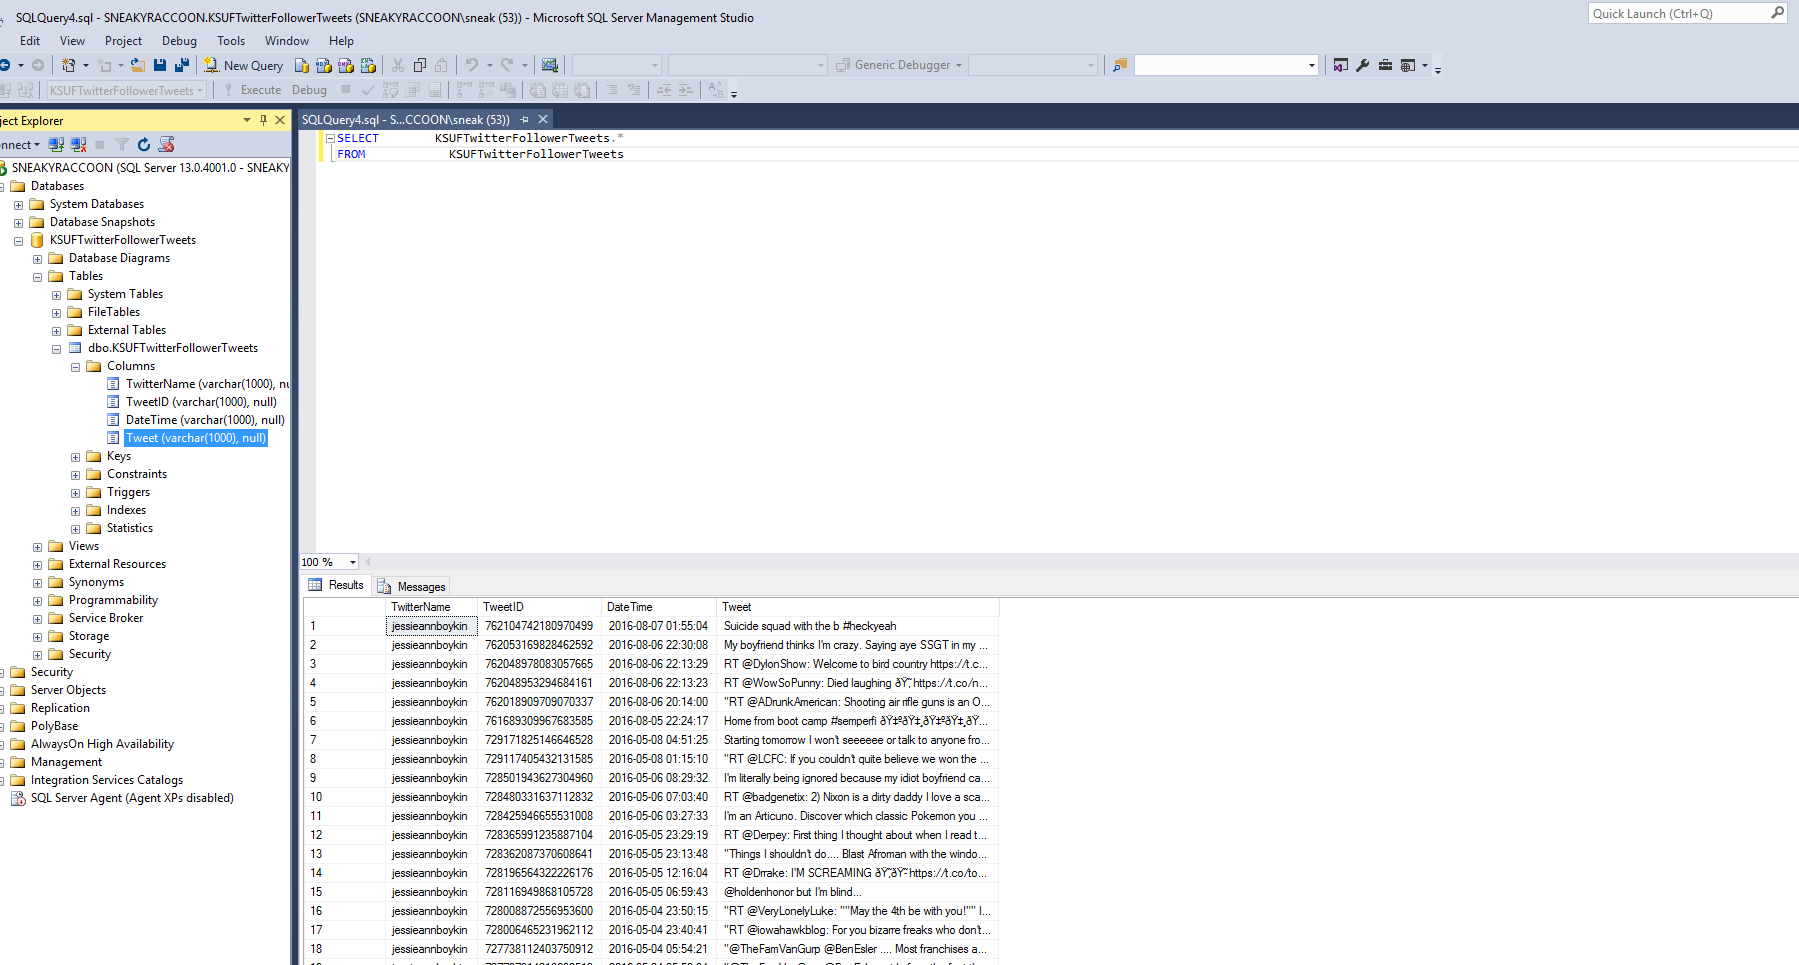

In [3]:
from IPython.display import Image
Image("data/SQL1.png")

### SQL used to only select data in the last two weeks (April 11 - 25)

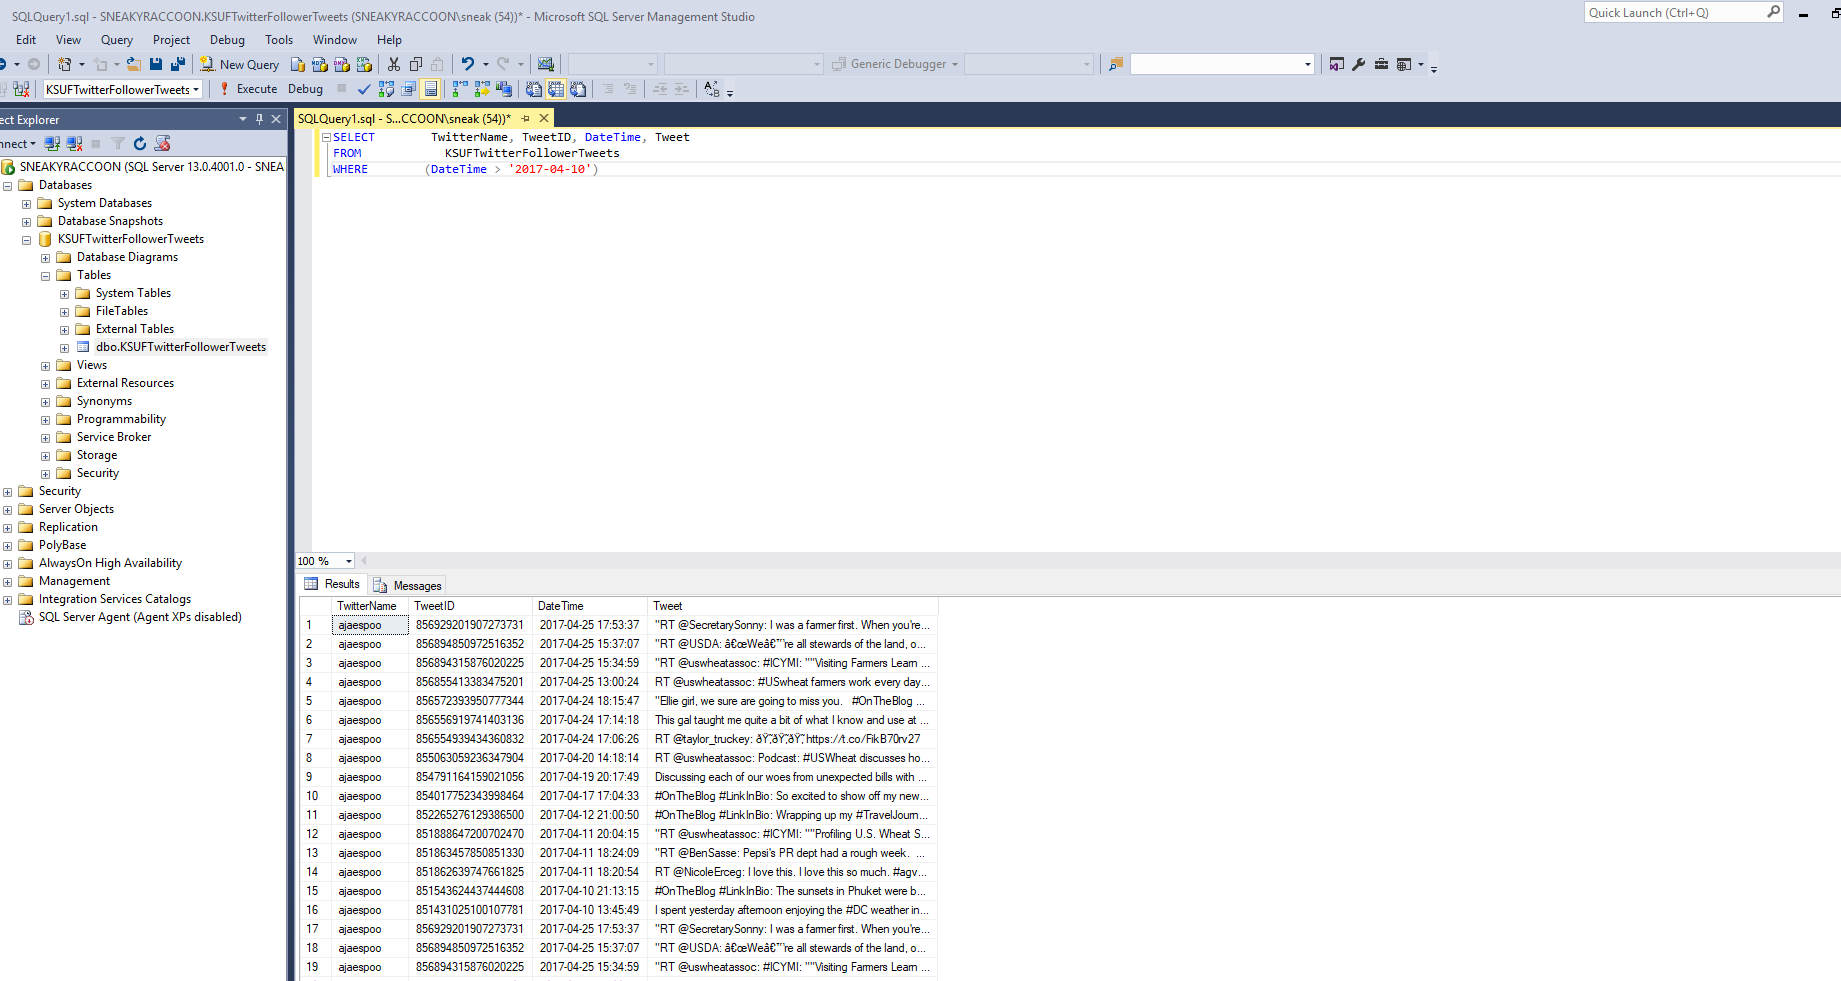

In [4]:
from IPython.display import Image
Image("data/SQL3.png")

### Get tweet count within last 2 weeks

In [5]:
import csv

# first column
biWeeklyTweetCount = []

openfile = open('data/KSUFTwitterFollowersTweetsBiWeekly.csv', 'rb')

r = csv.reader(openfile)

for i in r:
    biWeeklyTweetCount.append(i[0])
    
openfile.close()

print len(biWeeklyTweetCount)

29883


#  

# Descriptive Analytics

### Python Package Imports

In [6]:
import os
import pandas as pd
import numpy as np
import re
import matplotlib.pyplot as plt
% matplotlib inline

import nltk
from nltk import word_tokenize
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
porter_stemmer = PorterStemmer()
from nltk.stem import WordNetLemmatizer

import operator

### Import file containing only data in the last two weeks

In [7]:
data = []
openfile = open('data/KSUFTwitterFollowersTweetsBiWeekly.csv', 'rb')
r = csv.reader(openfile)
for i in r:
    data.append(i)    
openfile.close()

print len(data)

29883


In [8]:
# read first five followers only
for i in data[0:5]:
    print i[0]

﻿ajaespoo
ajaespoo
ajaespoo
ajaespoo
ajaespoo


In [9]:
# read first five tweet ids only
for i in data[0:5]:
    print i[1]

856929201907273731
856894850972516352
856894315876020225
856855413383475201
856572393950777344


In [10]:
# read first five dates only
for i in data[0:5]:
    print i[2]

2017-04-25 17:53:37
2017-04-25 15:37:07
2017-04-25 15:34:59
2017-04-25 13:00:24
2017-04-24 18:15:47


In [11]:
# read first five tweets only
for i in data[0:5]:
    print i[3]

"RT @SecretarySonny: I was a farmer first. When you're in #agriculture, you don't often need a tie. Rolling up my sleeves and getting to worâ€¦"
"RT @USDA: â€œWeâ€™re all stewards of the land, owned or rented, and our responsibility is to leave it better than we found it.â€ @SecretarySonnyâ€¦"
"RT @uswheatassoc: #ICYMI: ""Visiting Farmers Learn Quality is Very Important to Latin American Customers."" https://t.co/Y8o3ntzHIK #wheat #uâ€¦"
RT @uswheatassoc: #USwheat farmers work every day to contribute to a sustainable future in agriculture. #EarthDay @SustainableUSAg. https:/â€¦
"Ellie girl, we sure are going to miss you.   #OnTheBlog #LinkInBio #love #bordercollie #memoriesâ€¦ https://t.co/PHR3GYihuD"


### Declare Variables

In [12]:
followers = []
for i in data:
    followers.append(i[0])
    
tweetID = []
for i in data:
    tweetID.append(i[1])

date = []
for i in data:
    date.append(i[2])

tweets = []
for i in data:
    tweets.append(i[3]) 

print len(followers)
print len(tweetID)
print len(date)
print len(tweets)

29883
29883
29883
29883


### Tweets per unique follower

In [13]:
from collections import Counter

countUniqueFollowers = Counter(followers)
print countUniqueFollowers

Counter({'thekstatefamily': 1105, 'LR4KSU': 887, 'jamesrecruits': 842, 'hootsuite': 615, 'mfuentessanchez': 595, 'wildkatphoto': 512, 'AgweekMagazine': 422, 'AAUW': 363, 'pjscout': 361, 'ksucats96': 347, 'WSU_Noel_Schulz': 321, '_optimystic_': 314, 'careermarketplc': 310, 'KWCHPilar': 296, 'karla_stenzel': 296, 'IamCoOlGuy_': 286, 'advnwellnessmhk': 277, 'Godde55': 271, 'thisladyblogs': 260, 'DoubleD14_': 257, 'ArlanFF101': 235, 'patronaut0709': 234, 'wonderwall7': 233, 'DScottFritchen': 217, 'npconnect': 217, 'AllieMLousch': 207, 'msrachelj': 200, 'ADTerryMVista': 175, 'Myles67509674': 175, 'BakerAthletics': 173, 'DylanLysen': 170, 'AngelaDeines': 170, 'mittie4304': 167, 'KState_Fan': 161, 'DrEricGrabowsky': 150, 'blackbaud': 144, 'CaliRiceTree': 142, 'HarrierCat': 141, 'cschoeppel1': 136, 'Rhonda_A_Lee': 133, 'WildcatsGraffix': 129, 'kstatecollegian': 128, 'RealMikeT': 125, 'KStateAlphas': 125, 'mintner': 122, 'dal2077': 119, 'AndreBarton41': 117, 'kstatesports': 117, 'KSDBFM': 117, 

In [14]:
# how many unique followers in the data?
len(countUniqueFollowers)

1143

In [15]:
#how many tweets per followers?

float(len(tweets)/len(countUniqueFollowers))

26.0

In [16]:
# view unique followers
for i in countUniqueFollowers:
    print i

Karen1pp5
matteschindler
shelleygardner
KSU_EMAW
BioKansas
kennedy4kansas
patronaut0709
livsbee
KWCHDevon
paulattwater
AdamKramerSr
mccainksu
KStateWRugby
heatherswoods
tmobs1078
ScrappyBritches
ppride1
KrotzForKState
KStatePride
colbert_hills
KStateProvost
thechoraldoctor
parnhold
KSU_CDBusiness
MHKAllDay
amymillie
kstateagecon
kimberlyrie7
thejustinbarton
IanSparks35
RaffertyLab
emilykofoed
tori_burkhart
KSUFIJI
Juli_Blevins
molly6697
jwalk1993
MorgieJ
KStateOlathe
magsmeyer15
Brunkow
KStateTDA
arnickl
KappaSigmaKSU
ksucanola
Biotech365
KStateVPR
SaraWallacea007
danmerker
KStateGeology
BergkampAndrew
wildcatvictory
whs_archangel
HarleyRayce
Steve_Letourn
CASEASAP_D6
DaveGTM
bestt27
HarrierCat
sumo7195
CorinnaBlog
AllieMLousch
KStateAdmission
trpeep24
LarsonStephanie
KSUCVM
KonzaDistrict
mpkelso
CoachMaxwell261
Jinjur_18
BTKSU
KPNatsFan
katie_layne7
Ivabagowa
kmorganphd
blackbaud
ksubsu
pambikes4donuts
DamonFairchild1
KSUfanJen
TurnerCo_KC
JillOst
flinthills
drewpaske
The_Shep_
joebus

In [17]:
# twentyfive most active followers
activetweeters = countUniqueFollowers.most_common(25)
activetweeters_df = pd.DataFrame(activetweeters)
activetweeters_df

0     1
0   thekstatefamily  1105
1            LR4KSU   887
2     jamesrecruits   842
3         hootsuite   615
4   mfuentessanchez   595
5      wildkatphoto   512
6    AgweekMagazine   422
7              AAUW   363
8           pjscout   361
9         ksucats96   347
10  WSU_Noel_Schulz   321
11     _optimystic_   314
12  careermarketplc   310
13        KWCHPilar   296
14    karla_stenzel   296
15      IamCoOlGuy_   286
16  advnwellnessmhk   277
17          Godde55   271
18    thisladyblogs   260
19       DoubleD14_   257
20       ArlanFF101   235
21    patronaut0709   234
22      wonderwall7   233
23   DScottFritchen   217
24        npconnect   217

### Original tweets vs retweets

In [18]:
#remove retweets

originaltweets = []

for tweet in tweets:
    if 'rt @' not in tweet.lower():
        originaltweets.append(tweet)
        
len(originaltweets)

16731

In [19]:
# get retweets only

#remove retweets

retweets_only = []

for tweet in tweets:
    if 'rt @' in tweet.lower():
        retweets_only.append(tweet)
        
len(retweets_only)

13152

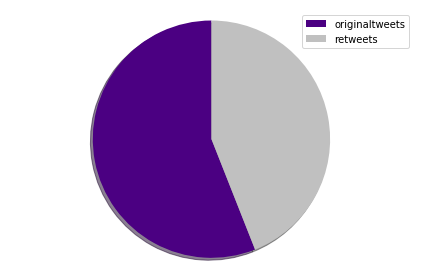

In [20]:
# make pie chart showing breakdown of tweet type

import matplotlib.pyplot as plt

labels = ['originaltweets', 'retweets']
sizes = [len(originaltweets), len(retweets_only)]
colors = ['indigo', 'silver']
patches, texts = plt.pie(sizes, colors=colors, shadow=True, startangle=90)
plt.legend(patches, labels, loc="best")
plt.axis('equal')
plt.tight_layout()
plt.show()

### Visable Users

In [21]:
# extract all followers from tweets
    
import re

for tweet in tweets[:5]:
    print re.findall(r"(?<=@)\w+", tweet)

['SecretarySonny']
['USDA', 'SecretarySonny']
['uswheatassoc']
['uswheatassoc', 'SustainableUSAg']
[]


In [22]:
#clean up follower data

for tweet in tweets[:5]:
    a = re.findall(r"(?<=@)\w+", tweet)
    for i in a:
        print '@'+i

@SecretarySonny
@USDA
@SecretarySonny
@uswheatassoc
@uswheatassoc
@SustainableUSAg


In [23]:
visible_followers = []

for tweet in tweets:
    a = re.findall(r"(?<=@)\w+", tweet)
    for i in a:
        visible_followers.append(['@'+i])

In [24]:
#compute frequency distribution for visible followers in the tweets
import nltk
from nltk import word_tokenize
from nltk.corpus import stopwords

#convert lists to strings
visible_followers = str(visible_followers)

#lowercase
visible_followers = visible_followers.lower()

#tokenize
visible_followers = visible_followers.split()

fdist = nltk.FreqDist(visible_followers)

fdist.most_common(10)

[("['@hallmarkchannel'],", 697),
 ("['@kstate'],", 362),
 ("['@wcth_tv'],", 289),
 ("['@kstatebsb'],", 227),
 ("['@kstatefb'],", 195),
 ("['@kellisrobinett'],", 185),
 ("['@erinkrakow'],", 181),
 ("['@kstatesports'],", 165),
 ("['@brbird'],", 140),
 ("['@emisorasunidas'],", 139)]

### URL metrics

In [25]:
#get URLs

for tweet in tweets[:10]:
    t = re.findall(r"(https://[^ ]+)", tweet)
    print t

[]
[]
['https://t.co/Y8o3ntzHIK']
[]
['https://t.co/PHR3GYihuD"']
['https://t.co/mc54Qez237']
['https://t.co/FikB70rv27']
['https://t.co/BjKVDfBRgK']
[]
['https://t.co/DI1UX8XmIS']


In [26]:
#make URLs clicky

for tweet in tweets[:10]:
    t = re.findall(r"(https://[^ ]+)", tweet)
    for i in t[:10]:
        print i

https://t.co/Y8o3ntzHIK
https://t.co/PHR3GYihuD"
https://t.co/mc54Qez237
https://t.co/FikB70rv27
https://t.co/BjKVDfBRgK
https://t.co/DI1UX8XmIS


In [27]:
#count urls

urls = []

for tweet in tweets:
    t = re.findall(r"(https://[^ ]+)", tweet)
    for i in t:
        urls.append(i)
        
len(urls)

22647

In [28]:
#top 10 urls

c = Counter(urls)
c.most_common(25)

[('https://\xc3\xa2\xe2\x82\xac\xc2\xa6', 98),
 ('https://t.c\xc3\xa2\xe2\x82\xac\xc2\xa6', 88),
 ('https://t.co\xc3\xa2\xe2\x82\xac\xc2\xa6', 86),
 ('https://t.co/rxMIBuyHdY', 86),
 ('https://\xc3\xa2\xe2\x82\xac\xc2\xa6"', 84),
 ('https://t.co/\xc3\xa2\xe2\x82\xac\xc2\xa6', 83),
 ('https://t.\xc3\xa2\xe2\x82\xac\xc2\xa6"', 81),
 ('https://t.\xc3\xa2\xe2\x82\xac\xc2\xa6', 81),
 ('https://t.c\xc3\xa2\xe2\x82\xac\xc2\xa6"', 78),
 ('https://t.co/\xc3\xa2\xe2\x82\xac\xc2\xa6"', 78),
 ('https://t\xc3\xa2\xe2\x82\xac\xc2\xa6', 77),
 ('https://t.co\xc3\xa2\xe2\x82\xac\xc2\xa6"', 67),
 ('https://t.co/rxMIBuh5Po', 63),
 ('https://t\xc3\xa2\xe2\x82\xac\xc2\xa6"', 63),
 ('https://t.co/wWYTGsYc3Z\xc3\xa2\xe2\x82\xac\xc2\xa6', 31),
 ('https://t.co/1h0jIT3D11', 25),
 ('https://t.co/wWYTGsYc3Z', 24),
 ('https://t.co/4SrfHmEMo3', 23),
 ('https://t.co/EuqHAl9G73"', 20),
 ('https://t.co/qK9wtOP0sn', 13),
 ('https://t.co/6CShOVBgU1', 13),
 ('https://t.co/93KkynWjHn', 13),
 ('https://t.co/xutdUtnIBo', 12

### Clean up the URLs

In [29]:
urls = []

for tweet in tweets:
    t = tweet.replace('"', '') # remove random " from being inserted at end of URL
    t = t.replace(')', '') # remove random ) from being inserted at end of URL
    t = t.replace('|', '') # remove random | from being inserted at end of URL
    t = re.sub(r'[^\x00-\x7f]',r'', t) # remove junk characters
    t = t.decode('utf8').encode('ascii', errors='ignore') # alternative remove junk characters method
    t = re.findall(r"(https://[^ ]+)", t)
    t = (word for word in t if len(word) >= 22)# remove truncated urls left over from removing junk characters
    for i in t:
        urls.append(i)
        
len(urls)

20707

In [30]:
#top 10 urls

c = Counter(urls)
c.most_common(10)

[('https://t.co/rxMIBuyHdY', 91),
 ('https://t.co/rxMIBuh5Po', 69),
 ('https://t.co/wWYTGsYc3Z', 55),
 ('https://t.co/1h0jIT3D11', 27),
 ('https://t.co/4SrfHmEMo3', 23),
 ('https://t.co/EuqHAl9G73', 20),
 ('https://t.co/H6ZDU0daj9', 15),
 ('https://t.co/qK9wtOP0sn', 13),
 ('https://t.co/6CShOVBgU1', 13),
 ('https://t.co/93KkynWjHn', 13)]

In [32]:
#Sites links above go to

# http://careermarketplace.org/ - Career seeking/posting website
# http://careermarketplace.org/ - Career seeking/posting website
# http://www.aauw.org/event/2017/03/tune-in-for-our-panel-on-how-to-standuptosexism/ - Advocacy workshop
# https://www.thetournament.com/teams/purple-and-black-kansas-state-alumni-0 - site was down at time of inspection
# https://twitter.com/carterjwm/status/849813577770778624/photo/1 - Tweet to Wendy's asking how to earn free chicken nuggets
# https://twitter.com/kstatesports/status/852987970466365440/photo/1 - K-State new Athletic Director Gene Taylor
# https://shipsims.com/ - Shipping company website
# http://collegefootball.ap.org/article/k-state-could-feature-nations-top-group-running-backs - K-State football
# https://twitter.com/KStateProvost/status/855455136856117248/photo/1 - K-State Foundation exceeds $1B fundraising goal
# https://twitter.com/kstatesports/status/855842992917159936/video/1 - K-State football

In [33]:
#count urls

len(c.most_common())

18510

### Hashtag Analysis

In [34]:
# examine hashtags in tweets

import re

for tweet in tweets[:50]:
    print re.findall(r"(?<=#)\w+", tweet)

['agriculture']
[]
['ICYMI', 'wheat', 'u']
['USwheat', 'EarthDay']
['OnTheBlog', 'LinkInBio', 'love', 'bordercollie', 'memories']
['rockstar']
[]
['USWheat', 'A']
['adulting', 'mylifebelike']
['OnTheBlog', 'LinkInBio']
['OnTheBlog', 'LinkInBio', 'TravelJournal', 'Thailand']
['ICYMI', 'USWheat', 'wheat']
[]
['agvocate', 'agchat']
['OnTheBlog', 'LinkInBio']
['DC']
['agriculture']
[]
['ICYMI', 'wheat', 'u']
['USwheat', 'EarthDay']
['OnTheBlog', 'LinkInBio', 'love', 'bordercollie', 'memories']
['rockstar']
[]
['USWheat', 'A']
['adulting', 'mylifebelike']
['OnTheBlog', 'LinkInBio']
['OnTheBlog', 'LinkInBio', 'TravelJournal', 'Thailand']
['ICYMI', 'USWheat', 'wheat']
[]
['agvocate', 'agchat']
['OnTheBlog', 'LinkInBio']
['DC']
['agriculture']
[]
['ICYMI', 'wheat', 'u']
['USwheat', 'EarthDay']
['OnTheBlog', 'LinkInBio', 'love', 'bordercollie', 'memories']
['rockstar']
[]
['USWheat', 'A']
['adulting', 'mylifebelike']
['OnTheBlog', 'LinkInBio']
['OnTheBlog', 'LinkInBio', 'TravelJournal', 'Thaila

In [35]:
# list one hashtag in a row and save them

hashtags = []

for tweet in tweets:
    a = re.findall(r"(?<=#)\w+", tweet)
    for i in a:
        hashtags.append(['#'+i])

In [36]:
#Review hashtags
for i in hashtags[:50]:
    print i

['#agriculture']
['#ICYMI']
['#wheat']
['#u']
['#USwheat']
['#EarthDay']
['#OnTheBlog']
['#LinkInBio']
['#love']
['#bordercollie']
['#memories']
['#rockstar']
['#USWheat']
['#A']
['#adulting']
['#mylifebelike']
['#OnTheBlog']
['#LinkInBio']
['#OnTheBlog']
['#LinkInBio']
['#TravelJournal']
['#Thailand']
['#ICYMI']
['#USWheat']
['#wheat']
['#agvocate']
['#agchat']
['#OnTheBlog']
['#LinkInBio']
['#DC']
['#agriculture']
['#ICYMI']
['#wheat']
['#u']
['#USwheat']
['#EarthDay']
['#OnTheBlog']
['#LinkInBio']
['#love']
['#bordercollie']
['#memories']
['#rockstar']
['#USWheat']
['#A']
['#adulting']
['#mylifebelike']
['#OnTheBlog']
['#LinkInBio']
['#OnTheBlog']
['#LinkInBio']


In [37]:
#compute frequency distribution for all the hashtags in the tweets

#convert lists to strings
hashtags_string = str(hashtags)

#lowercase
hashtags_string = hashtags_string.lower()

#tokenize
hashtags_string = hashtags_string.split()

hashtagFdist = nltk.FreqDist(hashtags_string)

hashtagFdist.most_common(50)

[("['#hearties'],", 719),
 ("['#kstate'],", 558),
 ("['#kstatefb'],", 195),
 ("['#kstatebsb'],", 185),
 ("['#hootchat'],", 116),
 ("['#ksleg'],", 111),
 ("['#emaw'],", 101),
 ("['#family'],", 86),
 ("['#standuptosexism'],", 81),
 ("['#jobseekers'],", 79),
 ("['#job'],", 79),
 ("['#earthday'],", 78),
 ("['#osint'],", 76),
 ("['#kansas'],", 76),
 ("['#jobs'],", 76),
 ("['#career'],", 74),
 ("['#fea2017'],", 73),
 ("['#gocougs'],", 67),
 ("['#nfldraft'],", 64),
 ("['#ks04'],", 62),
 ("['#royals'],", 62),
 ("['#kwch12'],", 58),
 ("['#eureformas'],", 57),
 ("['#championcivility'],", 55),
 ("['#marchforscience'],", 51),
 ("['#resume'],", 51),
 ("['#edchat'],", 51),
 ("['#free'],", 51),
 ("['#kstate2025'],", 48),
 ("['#dreamjob'],", 47),
 ("['#raisedroyal'],", 46),
 ("['#ksed'],", 44),
 ("['#resist'],", 44),
 ("['#fundraising'],", 44),
 ("['#ksu'],", 42),
 ("['#marketing'],", 41),
 ("['#careers'],", 40),
 ("['#flipthe6th'],", 39),
 ("['#kstatembb'],", 38),
 ("['#hiring'],", 38),
 ("['#flipthe

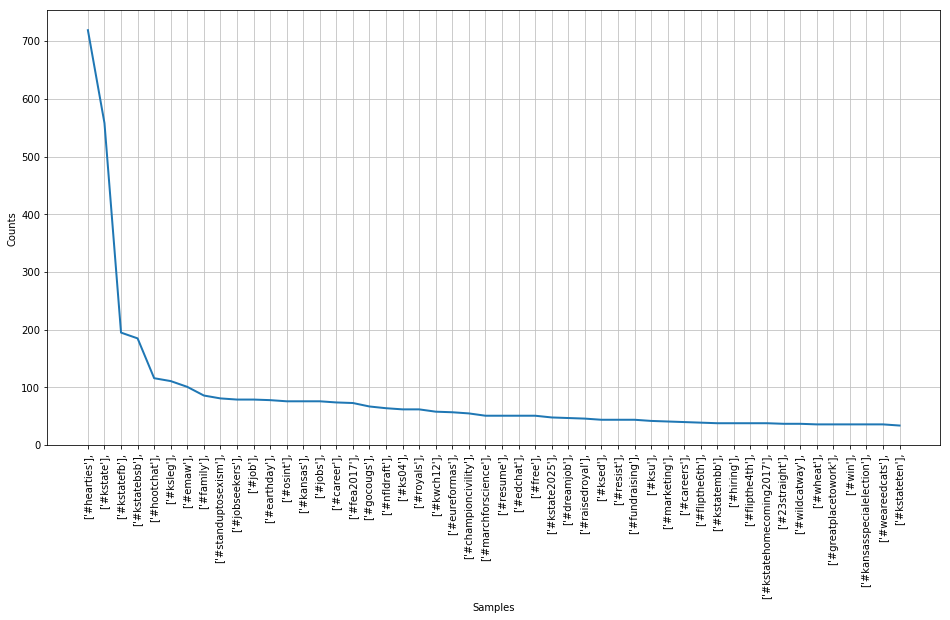

In [38]:
#make pretty chart
plt.figure(figsize=(16,8))
hashtagFdist.plot(50)

### Note to self: What is #hearties!? It refers to the Hallmark Channel show "When Calls the Heart" that had it's seaon 4 finale and was announced to continue season 5 on the Hallmark Channel in this time frame. It appears to be popular...

### Keep eye out for these hashtags in hashtag network analysis

#  

# Tweet text descriptive analytics

### Import Python Packages

In [39]:
import nltk
from nltk.corpus import stopwords
from nltk import FreqDist, word_tokenize
from nltk.stem.porter import PorterStemmer
from nltk.stem import WordNetLemmatizer

import re
import csv
import pandas as pd
import matplotlib.pyplot as plt
% matplotlib inline

### Prepare tweets for text analytics

In [40]:
#remove urls

tweets_wo_urls = []

for i in tweets:
    result = re.sub(r"http\S+", "", i)
    tweets_wo_urls.append(result)

tweets_wo_urls[:5]

['"RT @SecretarySonny: I was a farmer first. When you\'re in #agriculture, you don\'t often need a tie. Rolling up my sleeves and getting to wor\xc3\xa2\xe2\x82\xac\xc2\xa6"',
 '"RT @USDA: \xc3\xa2\xe2\x82\xac\xc5\x93We\xc3\xa2\xe2\x82\xac\xe2\x84\xa2re all stewards of the land, owned or rented, and our responsibility is to leave it better than we found it.\xc3\xa2\xe2\x82\xac\xc2\x9d @SecretarySonny\xc3\xa2\xe2\x82\xac\xc2\xa6"',
 '"RT @uswheatassoc: #ICYMI: ""Visiting Farmers Learn Quality is Very Important to Latin American Customers.""  #wheat #u\xc3\xa2\xe2\x82\xac\xc2\xa6"',
 'RT @uswheatassoc: #USwheat farmers work every day to contribute to a sustainable future in agriculture. #EarthDay @SustainableUSAg. ',
 '"Ellie girl, we sure are going to miss you.   #OnTheBlog #LinkInBio #love #bordercollie #memories\xc3\xa2\xe2\x82\xac\xc2\xa6 ']

In [41]:
#remove user names

tweets_wo_urls_usernames = []

for i in tweets_wo_urls:
    result = re.sub(r"(@[A-Za-z0-9]+)", "", i)
    tweets_wo_urls_usernames.append(result)

tweets_wo_urls_usernames[:5]

['"RT : I was a farmer first. When you\'re in #agriculture, you don\'t often need a tie. Rolling up my sleeves and getting to wor\xc3\xa2\xe2\x82\xac\xc2\xa6"',
 '"RT : \xc3\xa2\xe2\x82\xac\xc5\x93We\xc3\xa2\xe2\x82\xac\xe2\x84\xa2re all stewards of the land, owned or rented, and our responsibility is to leave it better than we found it.\xc3\xa2\xe2\x82\xac\xc2\x9d \xc3\xa2\xe2\x82\xac\xc2\xa6"',
 '"RT : #ICYMI: ""Visiting Farmers Learn Quality is Very Important to Latin American Customers.""  #wheat #u\xc3\xa2\xe2\x82\xac\xc2\xa6"',
 'RT : #USwheat farmers work every day to contribute to a sustainable future in agriculture. #EarthDay . ',
 '"Ellie girl, we sure are going to miss you.   #OnTheBlog #LinkInBio #love #bordercollie #memories\xc3\xa2\xe2\x82\xac\xc2\xa6 ']

In [42]:
#clean junk out of tweets
tweets_clean_completely = []

for i in tweets_wo_urls_usernames:
    result = ' '.join(re.sub(r"(@[A-Za-z0-9]+)|([^0-9A-Za-z \t])|(\w+:\/\/\S+)", "", i).split())
    tweets_clean_completely.append(result)

tweets_clean_completely[:5]

['RT I was a farmer first When youre in agriculture you dont often need a tie Rolling up my sleeves and getting to wor',
 'RT Were all stewards of the land owned or rented and our responsibility is to leave it better than we found it',
 'RT ICYMI Visiting Farmers Learn Quality is Very Important to Latin American Customers wheat u',
 'RT USwheat farmers work every day to contribute to a sustainable future in agriculture EarthDay',
 'Ellie girl we sure are going to miss you OnTheBlog LinkInBio love bordercollie memories']

In [43]:
#text processing

tweetTokens = str(tweets_clean_completely)

tweetTokens = tweetTokens.lower()

tweetTokens = re.sub("[^a-zA-Z0-9]", " ", tweetTokens)

tweetTokens = word_tokenize(tweetTokens)

#wordnet_lemmatizer = WordNetLemmatizer() # removing the ending s in kansas, turning off as this is a major problem for this data set
#tweetTokens = (wordnet_lemmatizer.lemmatize(word) for word in tweetTokens) # removing the ending s in kansas, turning off as this is a major problem for this data set

moreStopwords = set(("amp", "https", "via"))
tweetStoplist = set(stopwords.words("english")) | moreStopwords
tweetTokens = (word for word in tweetTokens if word not in tweetStoplist)

tweetTokens = (word for word in tweetTokens if word.isalpha())

tweetTokens = (word for word in tweetTokens if len(word) > 3)  

In [44]:
#Review frequency of tweetTokens
fdist = nltk.FreqDist(tweetTokens)
fdist.most_common(50)

[('kstate', 1373),
 ('today', 1079),
 ('great', 900),
 ('kansas', 790),
 ('hearties', 711),
 ('like', 695),
 ('time', 683),
 ('dont', 681),
 ('good', 615),
 ('week', 608),
 ('thanks', 592),
 ('happy', 546),
 ('love', 544),
 ('know', 538),
 ('game', 534),
 ('students', 528),
 ('people', 524),
 ('make', 506),
 ('year', 499),
 ('thank', 476),
 ('spring', 475),
 ('best', 450),
 ('first', 445),
 ('work', 444),
 ('want', 427),
 ('april', 427),
 ('help', 425),
 ('free', 417),
 ('state', 412),
 ('join', 411),
 ('need', 410),
 ('check', 393),
 ('student', 391),
 ('social', 371),
 ('find', 371),
 ('come', 371),
 ('trump', 369),
 ('tonight', 360),
 ('still', 358),
 ('last', 355),
 ('career', 355),
 ('next', 350),
 ('back', 346),
 ('going', 346),
 ('life', 344),
 ('family', 343),
 ('take', 340),
 ('tomorrow', 335),
 ('team', 334),
 ('think', 312)]

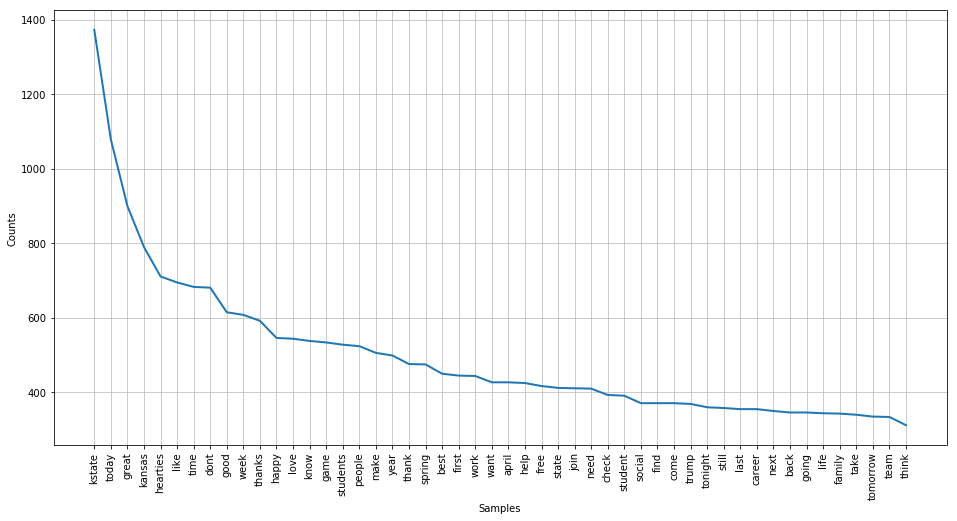

In [45]:
#plot tweetTokens

plt.figure(figsize=(16,8))
fdist.plot(50)

In [46]:
#Make pretty bigram table
tweetWordList = []

for k,v in fdist.most_common():
    tweetWordList.append([k,v])

tweetWordList = pd.DataFrame(tweetWordList)
tweetWordList = tweetWordList.rename(columns={0: 'word', 1: 'freq'})

tweetWordList

word  freq
0                 kstate  1373
1                  today  1079
2                  great   900
3                 kansas   790
4               hearties   711
5                   like   695
6                   time   683
7                   dont   681
8                   good   615
9                   week   608
10                thanks   592
11                 happy   546
12                  love   544
13                  know   538
14                  game   534
15              students   528
16                people   524
17                  make   506
18                  year   499
19                 thank   476
20                spring   475
21                  best   450
22                 first   445
23                  work   444
24                  want   427
25                 april   427
26                  help   425
27                  free   417
28                 state   412
29                  join   411
...                  ...   ...
27175           loveborn     1
27176        subramanian     1
27177           sundaram     1
27178            murdock     1
27179               enuf     1
27180              poets     1
27181               mitt     1
27182       cheaptuesday     1
27183            msstate     1
27184             throne     1
27185    muchtalkedabout     1
27186           squealed     1
27187    unsolvedmystery     1
27188   ampclimatologist     1
27189             myisha     1
27190           brambles     1
27191          grapevine     1
27192               svce     1
27193      getthingsdone     1
27194             nassau     1
27195        predonation     1
27196           debieron     1
27197         timcolston     1
27198             dearth     1
27199               boop     1
27200  lostdamagedstolen     1
27201               junk     1
27202             redoak     1
27203            myrissa     1
27204            mdclark     1

[27205 rows x 2 columns]

In [47]:
#Export to csv
tweetWordList[0:250].to_csv('data/tweetWordList.csv')

### Create Wordcloud

(-0.5, 799.5, 599.5, -0.5)

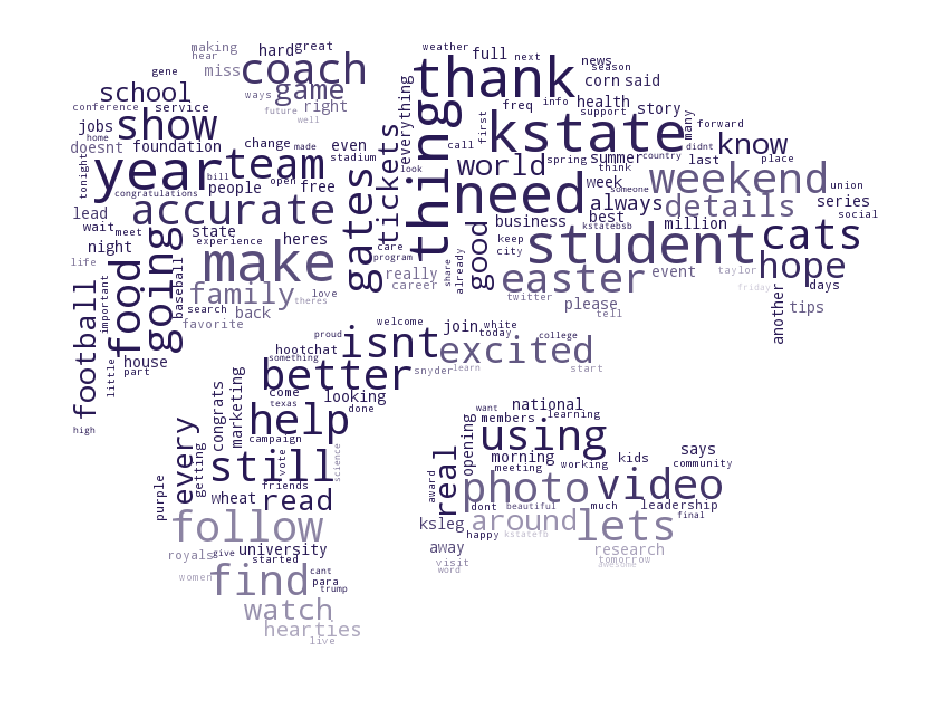

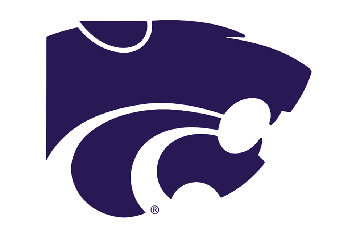

In [170]:
from os import path
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
from PIL import Image
import numpy as np

powercatWords = open(path.join('data/tweetWordList.csv')).read()

powercatMask = np.array(Image.open(path.join("data/powercat.jpg")))
powercatColoring = np.array(Image.open(path.join("data/powercat.jpg")))

image_colors = ImageColorGenerator(powercatColoring)

wordcloud = WordCloud(background_color="white", max_font_size=50, relative_scaling=.5, mask=powercatMask).generate(str(powercatWords))
plt.figure(figsize=(16,16))
plt.imshow(wordcloud.recolor(color_func=image_colors))
plt.axis("off")

plt.figure()
plt.imshow(powercatMask, cmap=plt.cm.gray)
plt.axis("off")

### Review Bigrams

In [48]:
# text processing

tweetTokens = str(tweets_clean_completely)

tweetTokens = tweetTokens.lower()

tweetTokens = re.sub("[^a-zA-Z0-9]", " ", tweetTokens)

tweetTokens = word_tokenize(tweetTokens)

#wordnet_lemmatizer = WordNetLemmatizer() # removing the ending s in kansas, turning off as this is a major problem for this data set
#tweetTokens = (wordnet_lemmatizer.lemmatize(word) for word in tweetTokens) # removing the ending s in kansas, turning off as this is a major problem for this data set

moreStopwords = set(("amp", "https", "via"))
tweetStoplist = set(stopwords.words("english")) | moreStopwords
tweetTokens = (word for word in tweetTokens if word not in tweetStoplist)

tweetTokens = (word for word in tweetTokens if word.isalpha())

tweetTokens = (word for word in tweetTokens if len(word) > 3)  

#Create your bigrams ... a bigram are a pair of two tokens
bigrams = nltk.bigrams(tweetTokens)
#compute frequency distribution for all the bigrams in the text
fdist_bi = nltk.FreqDist(bigrams)
fdist_bi.most_common(50)

[(('social', 'media'), 243),
 (('gene', 'taylor'), 214),
 (('spring', 'game'), 202),
 (('kansas', 'state'), 185),
 (('happy', 'easter'), 129),
 (('cant', 'wait'), 106),
 (('bill', 'snyder'), 101),
 (('accurate', 'career'), 89),
 (('dont', 'miss'), 84),
 (('make', 'sure'), 78),
 (('memorial', 'stadium'), 77),
 (('state', 'university'), 76),
 (('happy', 'birthday'), 71),
 (('hearties', 'hearties'), 66),
 (('free', 'search'), 62),
 (('kansas', 'city'), 59),
 (('looks', 'like'), 57),
 (('accurate', 'matches'), 57),
 (('next', 'week'), 56),
 (('hard', 'work'), 54),
 (('high', 'school'), 53),
 (('looking', 'forward'), 52),
 (('automatically', 'checked'), 50),
 (('dont', 'forget'), 49),
 (('last', 'night'), 48),
 (('career', 'connections'), 48),
 (('posted', 'photo'), 47),
 (('kstate', 'football'), 46),
 (('feminism', 'workplace'), 46),
 (('good', 'luck'), 45),
 (('white', 'house'), 45),
 (('jordan', 'willis'), 45),
 (('best', 'search'), 45),
 (('bruce', 'weber'), 44),
 (('search', 'algorithm

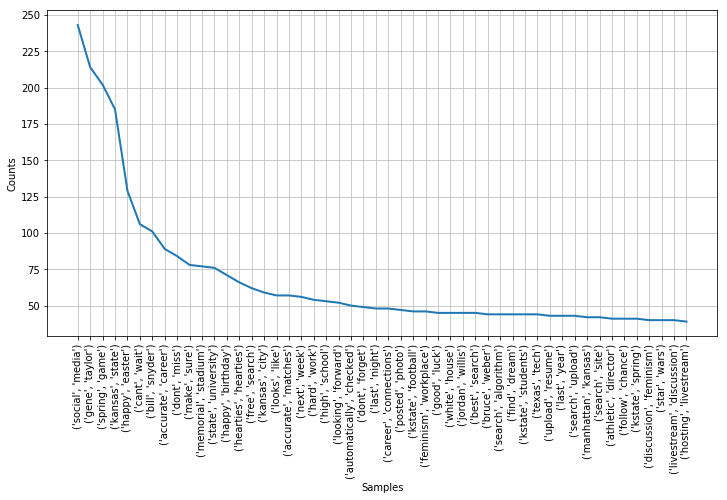

In [49]:
#plot word frequency using bigram
plt.figure(figsize=(12,6))
fdist_bi.plot(50)

In [50]:
#Make pretty bigram table
tweetBigrams = []

for k,v in fdist_bi.most_common():
    tweetBigrams.append([k,v])

tweetBigrams = pd.DataFrame(tweetBigrams)
tweetBigrams = tweetBigrams.rename(columns={0: 'word', 1: 'freq'})

tweetBigrams

word  freq
0                      (social, media)   243
1                       (gene, taylor)   214
2                       (spring, game)   202
3                      (kansas, state)   185
4                      (happy, easter)   129
5                         (cant, wait)   106
6                       (bill, snyder)   101
7                   (accurate, career)    89
8                         (dont, miss)    84
9                         (make, sure)    78
10                 (memorial, stadium)    77
11                 (state, university)    76
12                   (happy, birthday)    71
13                (hearties, hearties)    66
14                      (free, search)    62
15                      (kansas, city)    59
16                       (looks, like)    57
17                 (accurate, matches)    57
18                        (next, week)    56
19                        (hard, work)    54
20                      (high, school)    53
21                  (looking, forward)    52
22            (automatically, checked)    50
23                      (dont, forget)    49
24                       (last, night)    48
25               (career, connections)    48
26                     (posted, photo)    47
27                  (kstate, football)    46
28               (feminism, workplace)    46
29                        (good, luck)    45
...                                ...   ...
146051     (reports, worldnewstonight)     1
146052            (boost, fundraising)     1
146053            (leadership, skills)     1
146054           (google, firecracker)     1
146055               (china, analysts)     1
146056                   (pull, water)     1
146057           (suicide, prevention)     1
146058              (arrival, running)     1
146059       (mathematician, explains)     1
146060              (auction, players)     1
146061  (farmfoodtour, truthaboutfood)     1
146062         (republicans, announce)     1
146063         (adventurous, hearties)     1
146064                    (lmao, yall)     1
146065                  (lets, kstate)     1
146066              (overcome, summer)     1
146067                (katzs, friends)     1
146068            (graduating, senior)     1
146069                  (future, nina)     1
146070                (industry, away)     1
146071                  (caked, every)     1
146072               (dominance, goog)     1
146073                (debate, campus)     1
146074                 (program, hack)     1
146075                    (bomb, seem)     1
146076            (tomorrow, earthday)     1
146077               (weekend, kstate)     1
146078            (reporters, america)     1
146079           (restaurants, advice)     1
146080                   (party, fall)     1

[146081 rows x 2 columns]

In [51]:
#Export to csv
tweetBigrams[0:250].to_csv('data/output_fdist_bigram.csv')

#  

# Topic Modeling

In [52]:
import csv

import nltk
from nltk.corpus import stopwords
from nltk.stem.wordnet import WordNetLemmatizer
import re

import pandas as pd

import numpy
import matplotlib.pyplot as plt
%matplotlib inline

import gensim
from gensim.corpora import Dictionary
from gensim.models import ldamodel
from gensim.models.coherencemodel import CoherenceModel
from gensim.models.wrappers import LdaVowpalWabbit, LdaMallet
import pyLDAvis.gensim

import warnings
warnings.filterwarnings('ignore')  # To ignore all warnings that arise here to enhance clarity

C:\Users\sneak\Anaconda2\lib\site-packages\gensim\utils.py:855: UserWarning: detected Windows; aliasing chunkize to chunkize_serial
  warnings.warn("detected Windows; aliasing chunkize to chunkize_serial")


In [53]:
# Remove useless numbers and alphanumerical words including http     
topicTweets = [re.sub("(@[A-Za-z0-9]+)|([^0-9A-Za-z \t])|(\w+:\/\/\S+)", " ", text) for text in tweets_clean_completely]
# tokenize
topicTweets = [[word for word in text.lower().split() ] for text in topicTweets]
# stemming words: having --> have; friends --> friend
lmtzr = WordNetLemmatizer()
topicTweets = [[lmtzr.lemmatize(word) for word in text ] for text in topicTweets]
# remove common words 
stoplist = stopwords.words('english')
topicTweets = [[word for word in text if word not in stoplist] for text in topicTweets]
#remove short words
topicTweetsClean = [[ word for word in tokens if len(word) >= 3 ] for tokens in topicTweets]

In [54]:
# A list of extra stopwords specific to the debates transcripts (if you want to remove more stopwords)
extra_stopwords = ["amp", "https", "http", "via"]

extra_stoplist = extra_stopwords
topicTweetsClean = [[word for word in text if word not in extra_stoplist] for text in topicTweetsClean]
#https://github.com/alexperrier/datatalks/blob/master/debates/R/stm.R

In [55]:
topicTweetsClean[:5]

[['farmer',
  'first',
  'youre',
  'agriculture',
  'dont',
  'often',
  'need',
  'tie',
  'rolling',
  u'sleeve',
  'getting',
  'wor'],
 [u'steward',
  'land',
  'owned',
  'rented',
  'responsibility',
  'leave',
  'better',
  'found'],
 ['icymi',
  'visiting',
  u'farmer',
  'learn',
  'quality',
  'important',
  'latin',
  'american',
  u'customer',
  'wheat'],
 ['uswheat',
  u'farmer',
  'work',
  'every',
  'day',
  'contribute',
  'sustainable',
  'future',
  'agriculture',
  'earthday'],
 ['ellie',
  'girl',
  'sure',
  'going',
  'miss',
  'ontheblog',
  'linkinbio',
  'love',
  'bordercollie',
  u'memory']]

In [56]:
topicTweetsClean = [x for x in topicTweetsClean if x]
topicTweetsClean[:5]

[['farmer',
  'first',
  'youre',
  'agriculture',
  'dont',
  'often',
  'need',
  'tie',
  'rolling',
  u'sleeve',
  'getting',
  'wor'],
 [u'steward',
  'land',
  'owned',
  'rented',
  'responsibility',
  'leave',
  'better',
  'found'],
 ['icymi',
  'visiting',
  u'farmer',
  'learn',
  'quality',
  'important',
  'latin',
  'american',
  u'customer',
  'wheat'],
 ['uswheat',
  u'farmer',
  'work',
  'every',
  'day',
  'contribute',
  'sustainable',
  'future',
  'agriculture',
  'earthday'],
 ['ellie',
  'girl',
  'sure',
  'going',
  'miss',
  'ontheblog',
  'linkinbio',
  'love',
  'bordercollie',
  u'memory']]

In [57]:
len(topicTweetsClean)

29190

In [58]:
#create corpus

dictionary = Dictionary(topicTweetsClean)
corpus = [dictionary.doc2bow(text) for text in topicTweetsClean]

-3.99359044377
-4.89271217374
-5.92576812069
-4.48764831145
-6.25447067951
-6.37155017567
-7.1315455977
-7.75318312925
-6.94371221607
-8.30112551067
-8.97161786072
-9.4795662346
-8.48181871986
-8.04732417195
-9.08330615147
-9.56401050975
-10.247597802
-9.45653456246


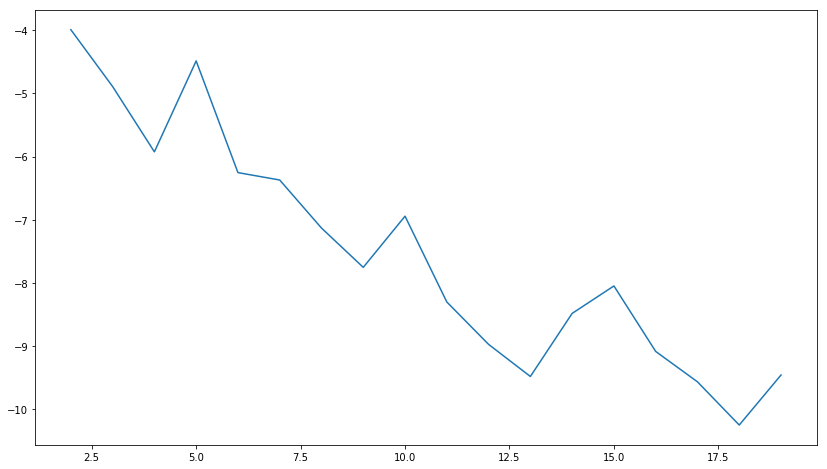

In [262]:
#test for k value

numpy.random.seed(1) # setting random seed to get the same results each time.
k_range = range(2,20)
scores = []
for k in k_range:
    goodLdaModel = ldamodel.LdaModel(corpus=corpus, id2word=dictionary, num_topics=k, passes=75)
    goodcm = CoherenceModel(model=goodLdaModel, corpus=corpus, dictionary=dictionary, coherence='u_mass')
    scores.append(goodcm.get_coherence())
    print goodcm.get_coherence()
    
plt.figure(figsize=(14, 8))
plt.plot(k_range, scores)

In [59]:
#assign best fit k value: k best fit = 2

numpy.random.seed(1) # setting random seed to get the same results each time. For a large dataset, high passes (75) would be desirable.
model = ldamodel.LdaModel(corpus, id2word=dictionary, num_topics=2, passes=75)

In [60]:
model.show_topics()

[(0,
  u'0.009*"student" + 0.009*"new" + 0.009*"social" + 0.007*"medium" + 0.007*"kstate" + 0.006*"job" + 0.005*"today" + 0.005*"career" + 0.004*"kansa" + 0.004*"join"'),
 (1,
  u'0.007*"day" + 0.007*"hearties" + 0.006*"get" + 0.005*"time" + 0.005*"like" + 0.005*"one" + 0.005*"dont" + 0.004*"good" + 0.004*"today" + 0.004*"know"')]

In [61]:
# print words without probability
for i in range(0,2):
    topics = model.show_topic(i, 10)
    print ', '.join([str(word[0]) for word in topics])

student, new, social, medium, kstate, job, today, career, kansa, join
day, hearties, get, time, like, one, dont, good, today, know


In [63]:
#show tweet propbability for each topic

lda_corpus = model[corpus]

results = []
for i in lda_corpus:
    #print i
    results.append(i)

results

[[(0, 0.15506860803906572), (1, 0.84493139196093425)],
 [(0, 0.05703366696931389), (1, 0.94296633303068611)],
 [(0, 0.95268124438899338), (1, 0.047318755611006597)],
 [(0, 0.72990832812381778), (1, 0.27009167187618233)],
 [(0, 0.048611623044640992), (1, 0.95138837695535905)],
 [(0, 0.16640542834380592), (1, 0.83359457165619411)],
 [(0, 0.74709367510729097), (1, 0.25290632489270898)],
 [(0, 0.94910019940386758), (1, 0.050899800596132319)],
 [(0, 0.069410460036234148), (1, 0.93058953996376581)],
 [(0, 0.28183628143007949), (1, 0.71816371856992056)],
 [(0, 0.26989601069924368), (1, 0.73010398930075637)],
 [(0, 0.92788325183621823), (1, 0.072116748163781816)],
 [(0, 0.073346389626319633), (1, 0.92665361037368033)],
 [(0, 0.084384140666582175), (1, 0.91561585933341794)],
 [(0, 0.90816250492418193), (1, 0.091837495075818121)],
 [(0, 0.073764149984765839), (1, 0.92623585001523423)],
 [(0, 0.1550669772758359), (1, 0.84493302272416404)],
 [(0, 0.057033840633551956), (1, 0.94296615936644812)],
 

In [64]:
documents = []

for i in topicTweetsClean:
    documents.append(str(i).replace(",", "").replace("u'","").replace("'", ""))

documents[:5]

['[farmer first youre agriculture dont often need tie rolling sleeve getting wor]',
 '[steward land owned rented responsibility leave better found]',
 '[icymi visiting farmer learn quality important latin american customer wheat]',
 '[uswheat farmer work every day contribute sustainable future agriculture earthday]',
 '[ellie girl sure going miss ontheblog linkinbio love bordercollie memory]']

In [65]:
# finding highest value from each row
toptopic = [max(collection, key=lambda x: x[1])[0] for collection in results]

toptopic = pd.DataFrame(toptopic)
documents = pd.DataFrame(documents)
documents = documents.rename(columns = {0: 'documents'})
summary = documents.join(toptopic)
summary.head()

documents  0
0  [farmer first youre agriculture dont often nee...  1
1  [steward land owned rented responsibility leav...  1
2  [icymi visiting farmer learn quality important...  0
3  [uswheat farmer work every day contribute sust...  0
4  [ellie girl sure going miss ontheblog linkinbi...  1

In [66]:
#count of tweets per topic
summary.groupby(0).count()

documents
0           
0      11107
1      18083

In [67]:
import pyLDAvis.gensim
pyLDAvis.enable_notebook()
pyLDAvis.gensim.prepare(model, corpus, dictionary)

PreparedData(topic_coordinates=            Freq  cluster  topics         x    y
topic                                           
1      58.893718        1       1  0.188842  0.0
0      41.106282        1       2 -0.188842  0.0, topic_info=      Category         Freq            Term        Total  loglift  logprob
term                                                                      
20844  Default   853.000000         student   853.000000  30.0000  30.0000
21878  Default   816.000000          social   816.000000  29.0000  29.0000
12653  Default   656.000000          medium   656.000000  28.0000  28.0000
6792   Default   590.000000             job   590.000000  27.0000  27.0000
4590   Default   868.000000        hearties   868.000000  26.0000  26.0000
25991  Default   895.000000             day   895.000000  25.0000  25.0000
10576  Default  1077.000000             new  1077.000000  24.0000  24.0000
24288  Default   430.000000          career   430.000000  23.0000  23.0000
5089   Default   704.000000            like   704.000000  22.0000  22.0000
21413  Default   706.000000            time   706.000000  21.0000  21.0000
587    Default   697.000000             one   697.000000  20.0000  20.0000
12327  Default   384.000000            join   384.000000  19.0000  19.0000
18483  Default   645.000000            dont   645.000000  18.0000  18.0000
6799   Default   373.000000           april   373.000000  17.0000  17.0000
19974  Default   359.000000           check   359.000000  16.0000  16.0000
13004  Default   561.000000            good   561.000000  15.0000  15.0000
4162   Default   331.000000        hootchat   331.000000  14.0000  14.0000
28013  Default   552.000000            know   552.000000  13.0000  13.0000
939    Default   311.000000           learn   311.000000  12.0000  12.0000
7475   Default   523.000000            love   523.000000  11.0000  11.0000
16878  Default   500.000000            game   500.000000  10.0000  10.0000
7332   Default   492.000000          people   492.000000   9.0000   9.0000
24193  Default   523.000000            need   523.000000   8.0000   8.0000
23083  Default   275.000000       marketing   275.000000   7.0000   7.0000
25781  Default   272.000000             use   272.000000   6.0000   6.0000
15795  Default   264.000000           award   264.000000   5.0000   5.0000
1318   Default   267.000000           video   267.000000   4.0000   4.0000
7374   Default   441.000000           happy   441.000000   3.0000   3.0000
161    Default   242.000000         service   242.000000   2.0000   2.0000
16121  Default   240.000000         welcome   240.000000   1.0000   1.0000
...        ...          ...             ...          ...      ...      ...
14238   Topic2   188.302084  congratulation   188.811825   0.8863  -6.2044
22543   Topic2   203.077826          taylor   203.633744   0.8863  -6.1288
13141   Topic2   200.754665         program   201.326843   0.8862  -6.1403
9550    Topic2   217.863165            read   218.500977   0.8861  -6.0586
8138    Topic2   187.408783       community   187.966763   0.8860  -6.2091
3303    Topic2   188.845462          campus   189.447896   0.8858  -6.2015
5970    Topic2   152.978863        director   153.497918   0.8856  -6.4121
26733   Topic2   158.543814             tip   159.082961   0.8856  -6.3764
3419    Topic2   145.354816       education   145.871411   0.8855  -6.4632
13820   Topic2   176.934693          member   177.564733   0.8855  -6.2666
23489   Topic2   217.239373        business   218.013435   0.8855  -6.0614
3141    Topic2   154.155033      university   154.707238   0.8854  -6.4045
4162    Topic2   330.480420        hootchat   331.669253   0.8854  -5.6419
25781   Topic2   271.690451             use   272.849966   0.8848  -5.8378
16121   Topic2   239.948106         welcome   240.811964   0.8854  -5.9620
23700   Topic2   203.862794           event   204.662792   0.8851  -6.1250
1318    Topic2   265.524324           video   267.494572   0.8816  -5.8607
11736   Top

#  

# Sentiment Analysis

In [89]:
#imports

from pattern.en import sentiment

In [115]:
#calculate sentiment scores

for tweet in topicTweetsClean:
    score = sentiment(tweet)
    print score[0], score[1] 

0.25 0.333333333333
0.5 0.5
0.2 0.5
0.0 0.125
0.5 0.744444444444
-0.2 0.6
0.0 0.0
0.0 0.3
0.1 1.0
0.255681818182 0.602272727273
0.0 0.0
0.0 0.0
-0.1 0.4
0.4 0.466666666667
0.5 0.75
0.2 0.35
0.25 0.333333333333
0.5 0.5
0.2 0.5
0.0 0.125
0.5 0.744444444444
-0.2 0.6
0.0 0.0
0.0 0.3
0.1 1.0
0.255681818182 0.602272727273
0.0 0.0
0.0 0.0
-0.1 0.4
0.4 0.466666666667
0.5 0.75
0.2 0.35
0.25 0.333333333333
0.5 0.5
0.2 0.5
0.0 0.125
0.5 0.744444444444
-0.2 0.6
0.0 0.0
0.0 0.3
0.1 1.0
0.255681818182 0.602272727273
0.0 0.0
0.0 0.0
-0.1 0.4
0.0 0.0
0.0 0.0
0.6 0.775
0.0 0.0
0.85 1.0
0.0 0.0
0.0 0.0
0.616666666667 0.75
0.0 0.0
0.7 0.9
0.8 0.9
0.8 1.0
0.0 0.0
0.0 1.0
0.4 0.408333333333
0.0 0.0
0.0 0.0
0.4 0.4
0.125 0.283333333333
0.0 0.0
0.0 0.0
0.3 0.7
0.0 0.0
0.0 0.0
0.35 0.4
0.0 0.5
0.6 0.7
0.5 0.5
0.0 0.0
-0.2 0.6
0.0 0.4
0.0 0.0
0.3 0.85
0.1 0.1
0.0 0.0
0.55 0.794444444444
0.1 0.1
0.0 0.0
0.2 0.2
0.0 0.3
0.1 0.1
0.6 0.8
0.2 0.2
0.25 0.3
0.0 0.0
0.0 0.0
0.6 0.9
0.8 0.875
0.0 0.0
0.136363636364 0.4

In [91]:
#place tweets into appropriate buckets

patternPositiveReview = []
patternNegativeReview = []
patternNeutralReview = []

for tweet in topicTweetsClean:
    score = sentiment(tweet)
    if score[0] > 0:
        patternPositiveReview.append(tweet)
    elif score[0] == 0:
        patternNeutralReview.append(tweet)
    else:
        patternNegativeReview.append(tweet)
        
print len(patternPositiveReview)
print len(patternNegativeReview)
print len(patternNeutralReview)

12270
3262
13658


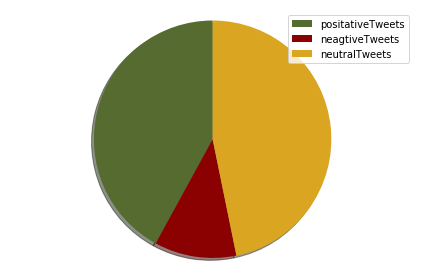

In [92]:
# make pie chart showing breakdown of tweet type

import matplotlib.pyplot as plt

labels = ['positativeTweets', 'neagtiveTweets', 'neutralTweets']
sizes = [len(patternPositiveReview), len(patternNegativeReview), len(patternNeutralReview)]
colors = ['darkolivegreen', 'darkred', 'goldenrod']
patches, texts = plt.pie(sizes, colors=colors, shadow=True, startangle=90)
plt.legend(patches, labels, loc="best")
plt.axis('equal')
plt.tight_layout()
plt.show()

### Positive Review Descriptive Analysis

In [116]:
# remove extra brackets)
cleaned_positive_review_tokens = [x for y in patternPositiveReview for x in y]
cleaned_positive_review_tokens[:10]

['farmer',
 'first',
 'youre',
 'agriculture',
 'dont',
 'often',
 'need',
 'tie',
 'rolling',
 u'sleeve']

In [117]:
# word frequency
from collections import Counter

positive_review_wordcounts= Counter(cleaned_positive_review_tokens)
positive_review_wordcounts.most_common()

[('new', 1210),
 ('great', 904),
 ('good', 605),
 ('kstate', 582),
 ('thanks', 570),
 ('today', 567),
 ('love', 549),
 ('happy', 542),
 ('day', 542),
 ('get', 530),
 ('win', 520),
 ('best', 446),
 ('job', 439),
 ('student', 437),
 ('free', 403),
 ('first', 397),
 ('time', 392),
 ('make', 366),
 ('year', 359),
 ('see', 346),
 ('social', 341),
 ('one', 328),
 ('like', 323),
 (u'kansa', 320),
 ('hearties', 319),
 ('career', 315),
 ('week', 313),
 ('right', 307),
 ('welcome', 276),
 ('know', 260),
 ('work', 259),
 ('find', 257),
 (u'medium', 257),
 ('much', 253),
 ('top', 251),
 ('dont', 246),
 ('want', 240),
 ('excited', 238),
 ('people', 237),
 ('way', 237),
 ('better', 233),
 ('proud', 230),
 ('come', 227),
 ('thank', 221),
 ('state', 207),
 ('need', 204),
 ('life', 203),
 ('easter', 200),
 ('take', 200),
 ('many', 197),
 ('2017', 197),
 ('thing', 192),
 ('sure', 192),
 ('team', 190),
 ('live', 186),
 ('family', 183),
 ('game', 182),
 ('look', 181),
 ('awesome', 179),
 ('accurate', 178)

In [118]:
# save the word frequency in dataframe (Excel like)
positivereview_wordfreq = pd.DataFrame(positive_review_wordcounts.most_common())
positivereview_wordfreq

0     1
0                new  1210
1              great   904
2               good   605
3             kstate   582
4             thanks   570
5              today   567
6               love   549
7              happy   542
8                day   542
9                get   530
10               win   520
11              best   446
12               job   439
13           student   437
14              free   403
15             first   397
16              time   392
17              make   366
18              year   359
19               see   346
20            social   341
21               one   328
22              like   323
23             kansa   320
24          hearties   319
25            career   315
26              week   313
27             right   307
28           welcome   276
29              know   260
...              ...   ...
14936          buffy     1
14937         dearth     1
14938       amiright     1
14939       micheles     1
14940      traducida     1
14941  stylistpicked     1
14942         branch     1
14943         toured     1
14944      3mtnvista     1
14945     conclusion     1
14946      withstood     1
14947      kansascan     1
14948       corcoran     1
14949       shredded     1
14950          mulch     1
14951     inherently     1
14952         twangy     1
14953        fleeced     1
14954       postions     1
14955       shredder     1
14956      experienc     1
14957    championciv     1
14958        gawande     1
14959      fivemonth     1
14960    inexcusable     1
14961          crull     1
14962     richardson     1
14963          gkcaa     1
14964     thebeatles     1
14965        gopokes     1

[14966 rows x 2 columns]

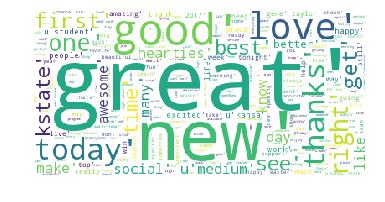

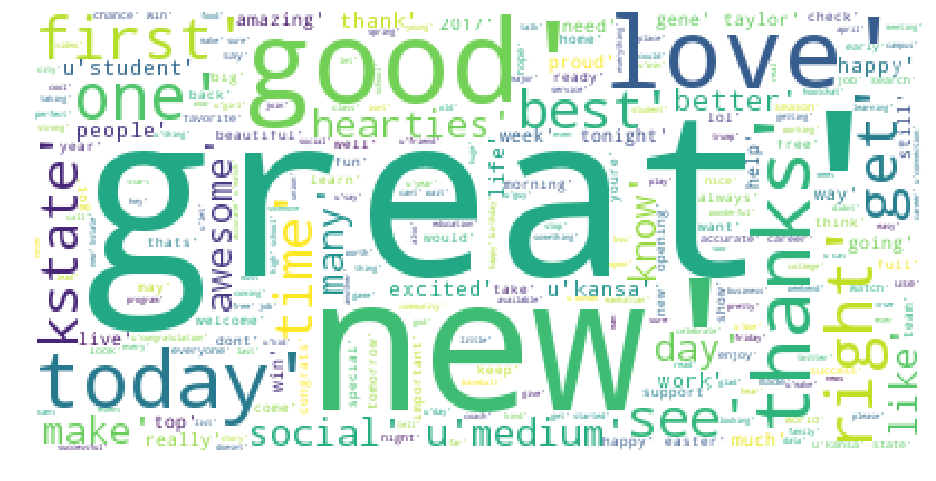

In [132]:
# This process could be very slow for a large corpus

from os import path
from wordcloud import WordCloud, STOPWORDS
import matplotlib.pyplot as plt
%matplotlib inline

text = str(cleaned_positive_review_tokens)

# Generate a word cloud image
wc = WordCloud(background_color="white", max_words=2000).generate(text)
wc.generate(text)

# Display the generated image:
# the matplotlib way:
plt.imshow(wc)
plt.axis("off")

# take relative word frequencies into account, lower max_font_size
wordcloud = WordCloud(max_font_size=40, relative_scaling=.5).generate(text)
plt.figure(figsize=(16,16))
plt.imshow(wc)
plt.axis("off")
plt.savefig("data/pos.png")

### Negative Tweet Descriptive Analysis

In [120]:
# remove extra brackets)
cleaned_Negative_review_tokens = [x for y in patternNegativeReview for x in y]
cleaned_Negative_review_tokens[:10]

['gal',
 'taught',
 'quite',
 'bit',
 'know',
 'use',
 'work',
 'everyday',
 'rockstar',
 u'pepsi']

In [121]:
# word frequency
from collections import Counter

negative_review_wordcounts= Counter(cleaned_Negative_review_tokens)
negative_review_wordcounts.most_common()

[('game', 431),
 ('spring', 197),
 ('get', 154),
 ('kstate', 147),
 ('year', 142),
 ('time', 122),
 ('week', 122),
 ('dont', 116),
 ('today', 114),
 ('day', 106),
 ('trump', 106),
 ('hard', 103),
 ('one', 101),
 ('mean', 97),
 ('ill', 92),
 ('little', 92),
 ('people', 88),
 ('like', 87),
 ('see', 80),
 ('center', 79),
 ('say', 78),
 ('work', 74),
 ('know', 74),
 (u'student', 73),
 ('2017', 71),
 ('bad', 70),
 ('take', 68),
 ('past', 68),
 ('black', 68),
 ('going', 64),
 ('new', 64),
 ('hearties', 62),
 (u'need', 60),
 (u'thing', 60),
 ('think', 59),
 (u'make', 58),
 ('football', 58),
 ('april', 58),
 ('wrong', 55),
 ('last', 55),
 ('state', 55),
 ('watch', 54),
 (u'kansa', 53),
 (u'tomorrow', 53),
 ('help', 52),
 ('look', 51),
 ('youre', 51),
 ('long', 51),
 ('kstatefb', 51),
 ('team', 50),
 ('never', 50),
 ('saturday', 50),
 ('still', 49),
 ('cant', 49),
 ('round', 49),
 ('life', 48),
 ('green', 48),
 (u'woman', 48),
 ('want', 47),
 ('could', 47),
 ('back', 47),
 ('million', 46),
 (u'

In [122]:
# save the word frequency in dataframe (Excel like)
negativereview_wordfreq = pd.DataFrame(negative_review_wordcounts.most_common())
negativereview_wordfreq

0    1
0            game  431
1          spring  197
2             get  154
3          kstate  147
4            year  142
5            time  122
6            week  122
7            dont  116
8           today  114
9             day  106
10          trump  106
11           hard  103
12            one  101
13           mean   97
14            ill   92
15         little   92
16         people   88
17           like   87
18            see   80
19         center   79
20            say   78
21           work   74
22           know   74
23        student   73
24           2017   71
25            bad   70
26           take   68
27           past   68
28          black   68
29          going   64
...           ...  ...
7501       wesley    1
7502      carried    1
7503     universe    1
7504     shipping    1
7505        surge    1
7506        swear    1
7507          owl    1
7508          owe    1
7509      clifton    1
7510    headphone    1
7511      hotline    1
7512         rhms    1
7513     solidify    1
7514        shane    1
7515       foxall    1
7516     master23    1
7517      squeeze    1
7518  demonstrate    1
7519       faggot    1
7520         cmon    1
7521     horrific    1
7522     humbling    1
7523    improving    1
7524         june    1
7525       risked    1
7526          gap    1
7527    alienated    1
7528         5630    1
7529        gkcaa    1
7530      gopokes    1

[7531 rows x 2 columns]

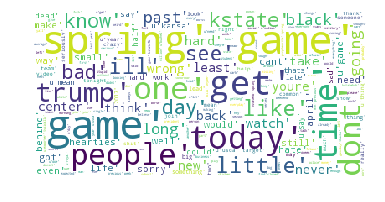

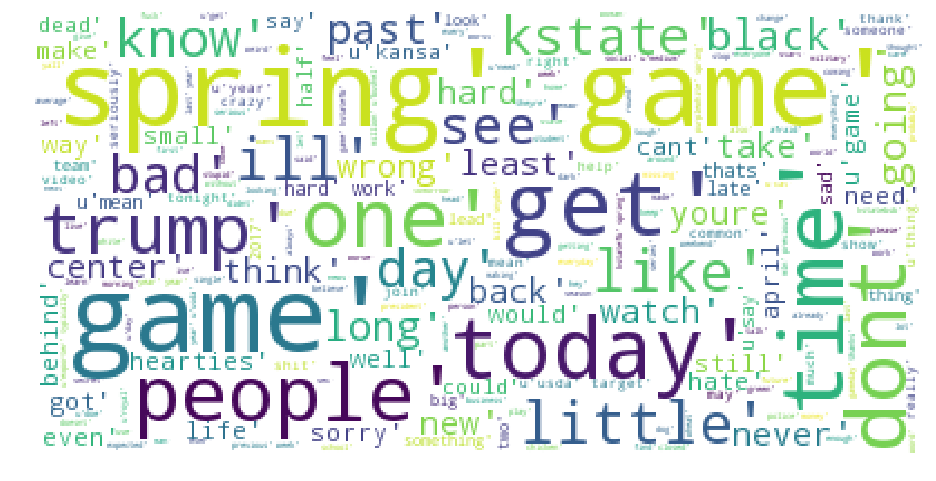

In [136]:
# This process could be very slow for a large corpus

from os import path
from wordcloud import WordCloud, STOPWORDS
import matplotlib.pyplot as plt
%matplotlib inline

text = str(cleaned_Negative_review_tokens)

# Generate a word cloud image
wc = WordCloud(background_color="white", max_words=2000).generate(text)
wc.generate(text)

# Display the generated image:
# the matplotlib way:
plt.imshow(wc)
plt.axis("off")

# take relative word frequencies into account, lower max_font_size
wordcloud = WordCloud(max_font_size=40, relative_scaling=.5).generate(text)
plt.figure(figsize=(16,16))
plt.imshow(wc)
plt.axis("off")
plt.savefig("data/neg.png")

### Neutral Tweet Descriptive Analysis

In [126]:
# remove extra brackets)
cleaned_neutral_review_tokens = [x for y in patternNeutralReview for x in y]
cleaned_neutral_review_tokens[:10]

['uswheat',
 u'farmer',
 'work',
 'every',
 'day',
 'contribute',
 'sustainable',
 'future',
 'agriculture',
 'earthday']

In [127]:
# word frequency
from collections import Counter

neutral_review_wordcounts= Counter(cleaned_neutral_review_tokens)
neutral_review_wordcounts.most_common()

[('kstate', 644),
 ('today', 508),
 (u'kansa', 418),
 ('day', 415),
 ('student', 409),
 ('get', 369),
 ('hearties', 330),
 ('dont', 319),
 ('one', 313),
 ('like', 312),
 (u'need', 290),
 ('see', 271),
 (u'year', 263),
 ('april', 262),
 ('week', 259),
 ('time', 255),
 ('2017', 251),
 ('que', 246),
 ('help', 241),
 ('know', 231),
 ('thank', 226),
 ('trump', 222),
 ('state', 221),
 ('want', 217),
 ('people', 214),
 ('join', 214),
 ('check', 210),
 (u'say', 207),
 ('make', 207),
 ('tonight', 190),
 ('take', 173),
 (u'way', 172),
 (u'job', 167),
 ('come', 164),
 ('let', 161),
 ('last', 158),
 ('team', 156),
 ('next', 156),
 ('tomorrow', 156),
 ('big', 156),
 ('del', 155),
 ('life', 152),
 ('back', 151),
 ('family', 150),
 ('congrats', 150),
 ('president', 148),
 ('still', 146),
 ('work', 144),
 ('look', 144),
 ('think', 143),
 ('going', 142),
 (u'award', 142),
 ('please', 138),
 ('cant', 136),
 ('learn', 135),
 ('thing', 134),
 ('los', 132),
 ('research', 131),
 (u'service', 130),
 ('spring

In [128]:
# save the word frequency in dataframe (Excel like)
neutralreview_wordfreq = pd.DataFrame(neutral_review_wordcounts.most_common())
neutralreview_wordfreq

0    1
0               kstate  644
1                today  508
2                kansa  418
3                  day  415
4              student  409
5                  get  369
6             hearties  330
7                 dont  319
8                  one  313
9                 like  312
10                need  290
11                 see  271
12                year  263
13               april  262
14                week  259
15                time  255
16                2017  251
17                 que  246
18                help  241
19                know  231
20               thank  226
21               trump  222
22               state  221
23                want  217
24              people  214
25                join  214
26               check  210
27                 say  207
28                make  207
29             tonight  190
...                ...  ...
18679       friends120    1
18680      meaningless    1
18681              1yr    1
18682           multic    1
18683  donutsandcoffee    1
18684        couponing    1
18685           multim    1
18686        sobornado    1
18687         difciles    1
18688       statehouse    1
18689             boop    1
18690           toured    1
18691             junk    1
18692           hanwha    1
18693          200300z    1
18694    underpressure    1
18695            lovbs    1
18696           redoak    1
18697       richardson    1
18698          sandler    1
18699           priced    1
18700             vana    1
18701             1866    1
18702           airpod    1
18703          mdclark    1
18704           dearly    1
18705            fritz    1
18706          pierson    1
18707          fiscala    1
18708       laundromat    1

[18709 rows x 2 columns]

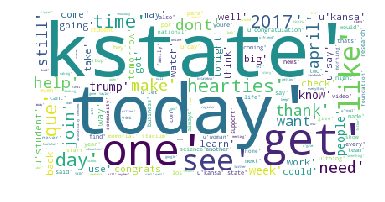

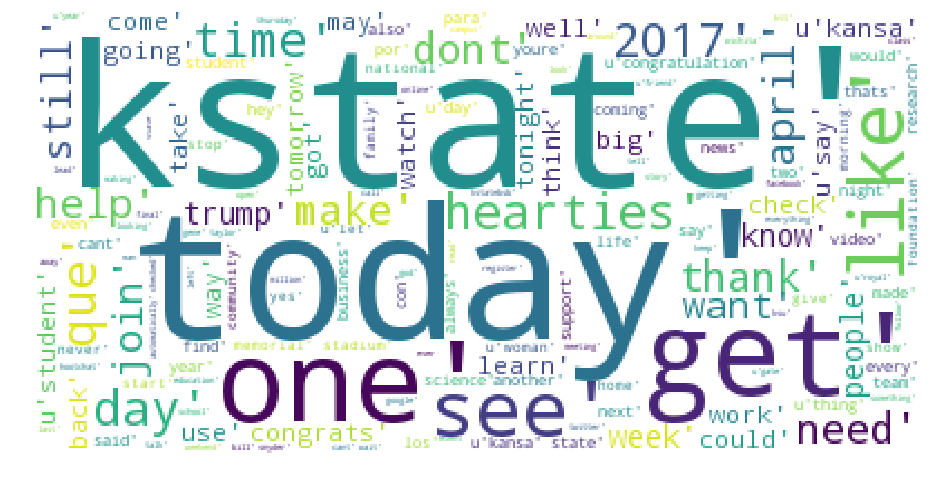

In [130]:
# This process could be very slow for a large corpus

from os import path
from wordcloud import WordCloud, STOPWORDS
import matplotlib.pyplot as plt
%matplotlib inline

text = str(cleaned_neutral_review_tokens)

# Generate a word cloud image
wc = WordCloud(background_color="white", max_words=2000).generate(text)
wc.generate(text)

# Display the generated image:
# the matplotlib way:
plt.imshow(wc)
plt.axis("off")

# take relative word frequencies into account, lower max_font_size
wordcloud = WordCloud(max_font_size=40, relative_scaling=.5).generate(text)
plt.figure(figsize=(16,16))
plt.imshow(wc)
plt.axis("off")
plt.savefig("data/neu.png")

#  

# Network Analysis

### Mention Network File For Analysis Creation

In [275]:
#review followers

followers[0:5]

['\xef\xbb\xbfajaespoo', 'ajaespoo', 'ajaespoo', 'ajaespoo', 'ajaespoo']

In [276]:
#clean up first entry

followers[0] = 'ajaespoo'

followers[0:5]

['ajaespoo', 'ajaespoo', 'ajaespoo', 'ajaespoo', 'ajaespoo']

In [277]:
#combine follers with thier tweets

mention = zip(followers,tweets)
    
mention[:5]

[('ajaespoo',
  '"RT @SecretarySonny: I was a farmer first. When you\'re in #agriculture, you don\'t often need a tie. Rolling up my sleeves and getting to wor\xc3\xa2\xe2\x82\xac\xc2\xa6"'),
 ('ajaespoo',
  '"RT @USDA: \xc3\xa2\xe2\x82\xac\xc5\x93We\xc3\xa2\xe2\x82\xac\xe2\x84\xa2re all stewards of the land, owned or rented, and our responsibility is to leave it better than we found it.\xc3\xa2\xe2\x82\xac\xc2\x9d @SecretarySonny\xc3\xa2\xe2\x82\xac\xc2\xa6"'),
 ('ajaespoo',
  '"RT @uswheatassoc: #ICYMI: ""Visiting Farmers Learn Quality is Very Important to Latin American Customers."" https://t.co/Y8o3ntzHIK #wheat #u\xc3\xa2\xe2\x82\xac\xc2\xa6"'),
 ('ajaespoo',
  'RT @uswheatassoc: #USwheat farmers work every day to contribute to a sustainable future in agriculture. #EarthDay @SustainableUSAg. https:/\xc3\xa2\xe2\x82\xac\xc2\xa6'),
 ('ajaespoo',
  '"Ellie girl, we sure are going to miss you.   #OnTheBlog #LinkInBio #love #bordercollie #memories\xc3\xa2\xe2\x82\xac\xc2\xa6 https://t.

In [278]:
#review follower and thier mentions

for tweet in mention:
    print tweet[0], re.findall(r"(?<=@)\w+", tweet[1])

ajaespoo ['SecretarySonny']
ajaespoo ['USDA', 'SecretarySonny']
ajaespoo ['uswheatassoc']
ajaespoo ['uswheatassoc', 'SustainableUSAg']
ajaespoo []
ajaespoo []
ajaespoo ['taylor_truckey']
ajaespoo ['uswheatassoc']
ajaespoo []
ajaespoo []
ajaespoo []
ajaespoo ['uswheatassoc']
ajaespoo ['BenSasse']
ajaespoo ['NicoleErceg']
ajaespoo []
ajaespoo []
ajaespoo ['SecretarySonny']
ajaespoo ['USDA', 'SecretarySonny']
ajaespoo ['uswheatassoc']
ajaespoo ['uswheatassoc', 'SustainableUSAg']
ajaespoo []
ajaespoo []
ajaespoo ['taylor_truckey']
ajaespoo ['uswheatassoc']
ajaespoo []
ajaespoo []
ajaespoo []
ajaespoo ['uswheatassoc']
ajaespoo ['BenSasse']
ajaespoo ['NicoleErceg']
ajaespoo []
ajaespoo []
ajaespoo ['SecretarySonny']
ajaespoo ['USDA', 'SecretarySonny']
ajaespoo ['uswheatassoc']
ajaespoo ['uswheatassoc', 'SustainableUSAg']
ajaespoo []
ajaespoo []
ajaespoo ['taylor_truckey']
ajaespoo ['uswheatassoc']
ajaespoo []
ajaespoo []
ajaespoo []
ajaespoo ['uswheatassoc']
ajaespoo ['BenSasse']
KStateOlath

In [ ]:
#put @ on mentioned

for tweet in mention:
    a = re.findall(r"(?<=@)\w+", tweet[1])
    for i in a:
        print tweet[0], '@'+i

ajaespoo @SecretarySonny
ajaespoo @USDA
ajaespoo @SecretarySonny
ajaespoo @uswheatassoc
ajaespoo @uswheatassoc
ajaespoo @SustainableUSAg
ajaespoo @taylor_truckey
ajaespoo @uswheatassoc
ajaespoo @uswheatassoc
ajaespoo @BenSasse
ajaespoo @NicoleErceg
ajaespoo @SecretarySonny
ajaespoo @USDA
ajaespoo @SecretarySonny
ajaespoo @uswheatassoc
ajaespoo @uswheatassoc
ajaespoo @SustainableUSAg
ajaespoo @taylor_truckey
ajaespoo @uswheatassoc
ajaespoo @uswheatassoc
ajaespoo @BenSasse
ajaespoo @NicoleErceg
ajaespoo @SecretarySonny
ajaespoo @USDA
ajaespoo @SecretarySonny
ajaespoo @uswheatassoc
ajaespoo @uswheatassoc
ajaespoo @SustainableUSAg
ajaespoo @taylor_truckey
ajaespoo @uswheatassoc
ajaespoo @uswheatassoc
ajaespoo @BenSasse
KStateOlathe @KSUCVM
KStateOlathe @KStateVDL
KStateOlathe @KStateOlathe
KStateOlathe @TheSandboxKC
KStateOlathe @KStateOlathe
KStateOlathe @CityofOlatheKS
KStateOlathe @KStateNews
KStateOlathe @KStateOlathe
KStateOlathe @TheSandboxKC
KStateOlathe @CityofOlatheKS
KStateOlathe

In [280]:
#put everything together

import csv

openfile = open("data/mentionnetwork.csv", "wb")
    
w = csv.writer(openfile)
for tweet in mention:
    a = re.findall(r"(?<=@)\w+", tweet[1])
    for i in a:
        w.writerow([tweet[0], '@'+i])
        
openfile.close()

### Load file into NodeXL for analysis

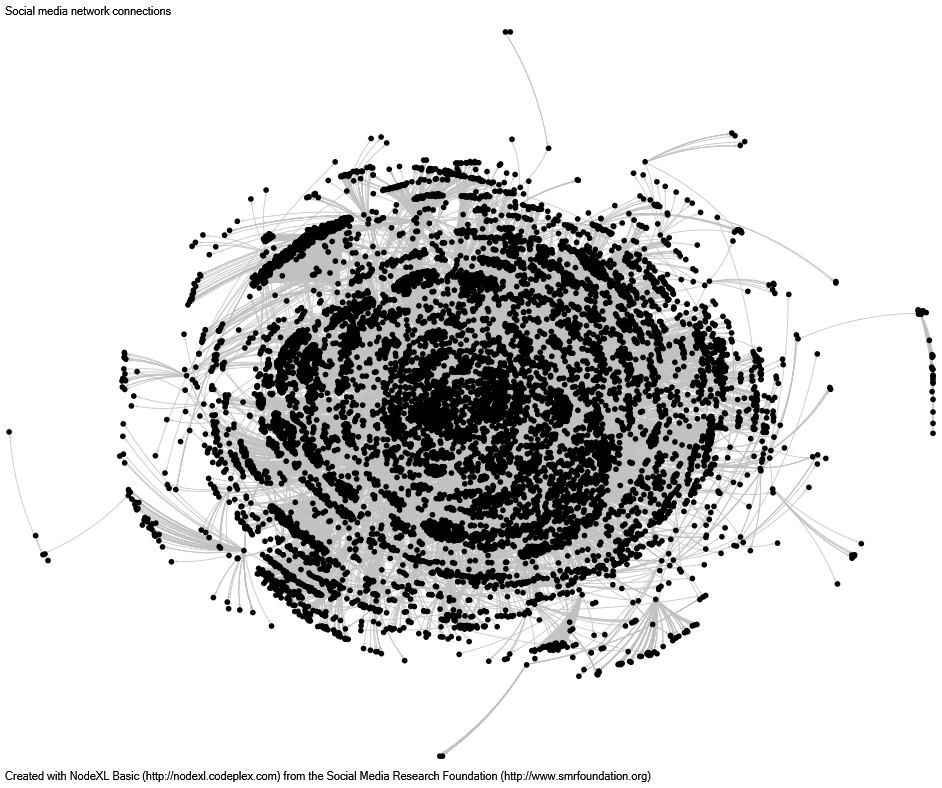

In [281]:
#network with manipulation

from IPython.display import Image
Image("data/MentionNetworkWholeNetwork.png")

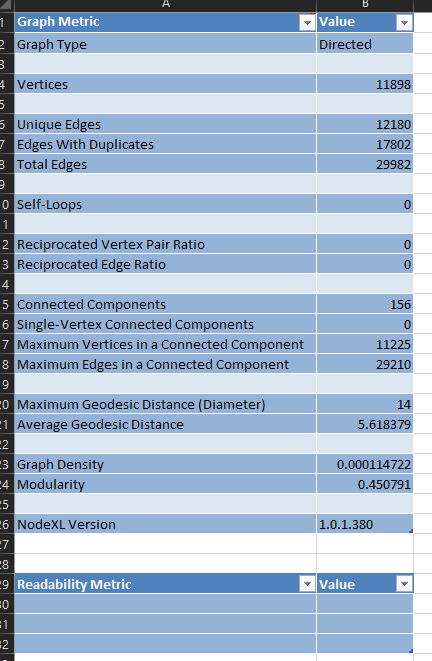

In [282]:
#Network Metrics

from IPython.display import Image
Image("data/MentionNetworkMetrics.png")

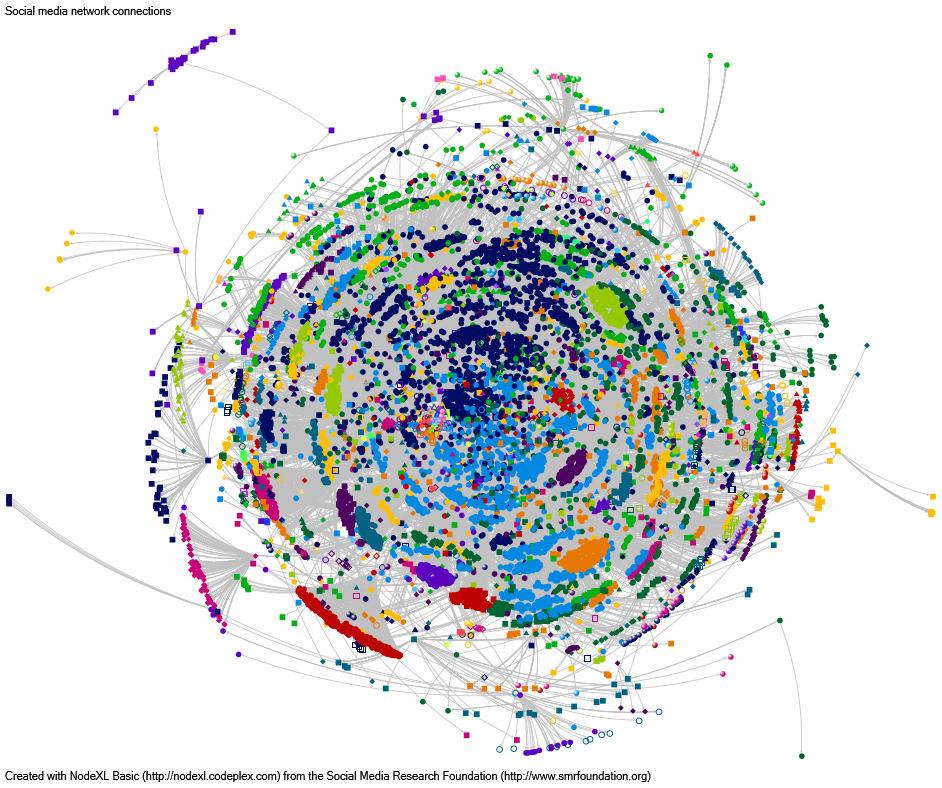

In [283]:
#network with groups created

from IPython.display import Image
Image("data/MentionNetworkWholeNetworkGroups.png")

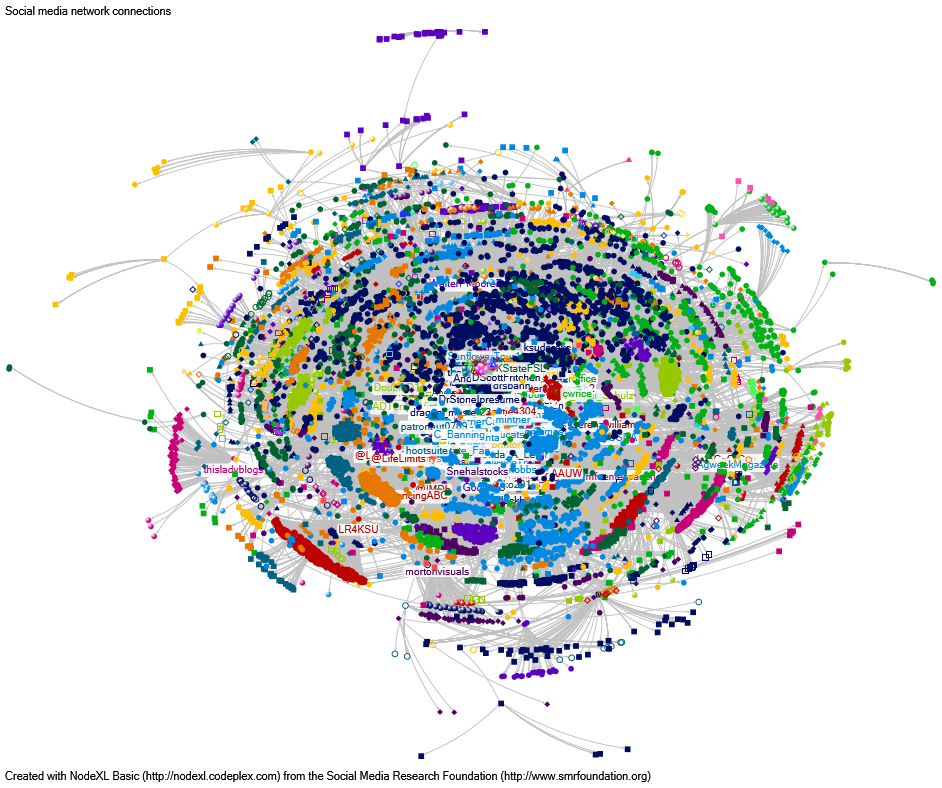

In [284]:
#network with groups and key people identified
#Vertex Label = Vertex
#Vertex Label Position calculated by Betweenness Centrality 
#Betweenness Centrality source value being greater than or equal to the 100th largest score

from IPython.display import Image
Image("data/MentionNetworkWholeNetworkGroupsWithLabels.png")

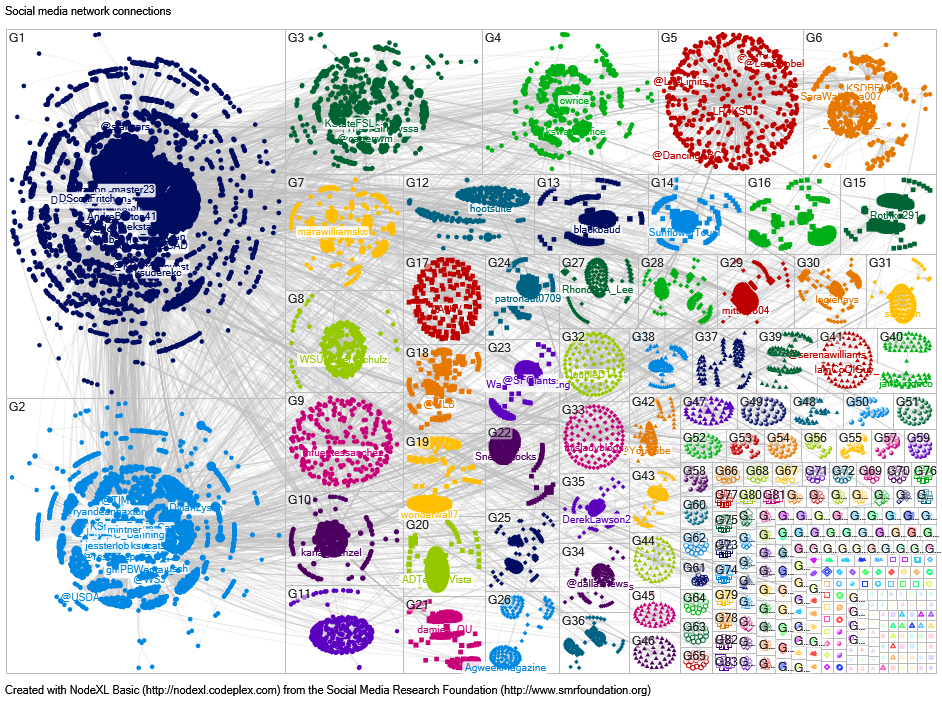

In [285]:
#network broken into corresponding groups

from IPython.display import Image
Image("data/MentionNetworkGroupNetwork.png")

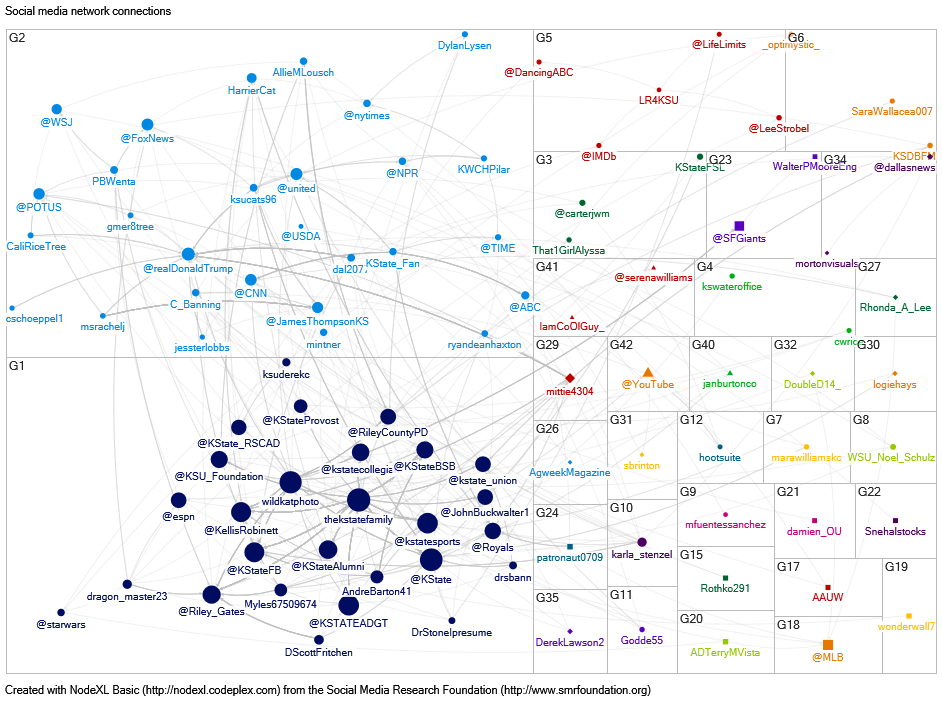

In [286]:
#Only top 100 vertices shown
#Vertex Visibility calculated by Betweenness Centrality 
#Betweenness Centrality source value being greater than or equal to the 100th largest score
#Vertex size calculated by Eigenvector Centrality
#Vertex largest size = 20, smallest = 1

from IPython.display import Image
Image("data/MentionNetworkGroupNetworkTop100.png")

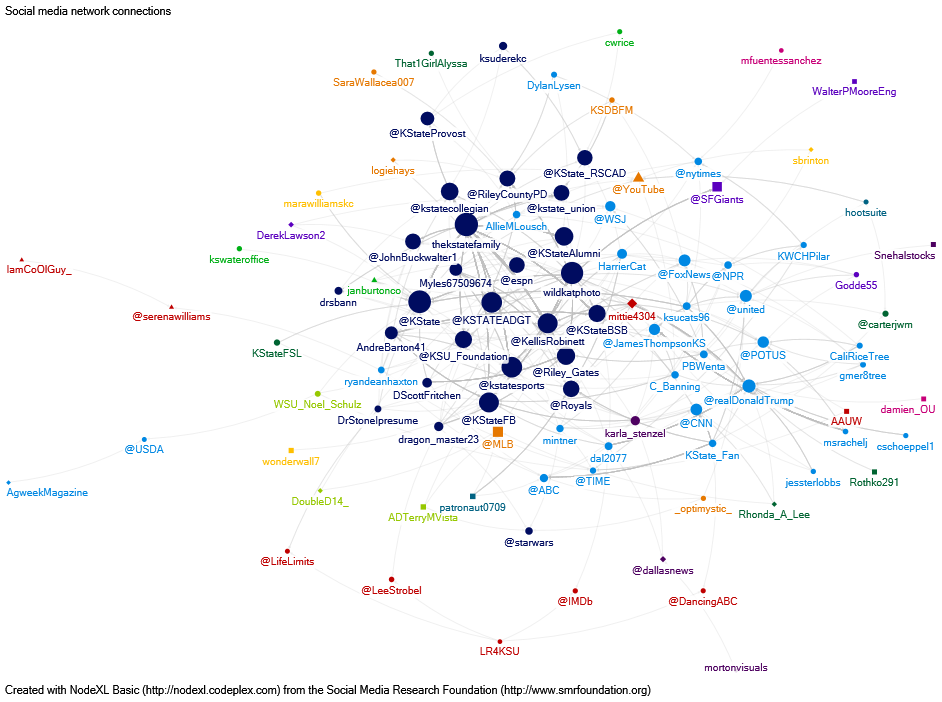

In [287]:
#Network returned to the whole network visualization with the manipulations left in place

from IPython.display import Image
Image("data/MentionNetworkWholeNetworkGroupsTop100.png")

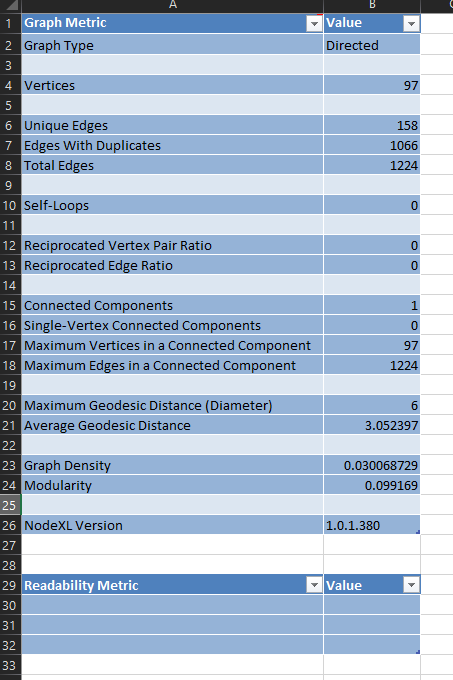

In [288]:
#Filtered Network Metrics

from IPython.display import Image
Image("data/MentionFilteredNetworkMetrics.png")

## Hashtag Network file creation

In [289]:
#review tweets

tweets[0:5]

['"RT @SecretarySonny: I was a farmer first. When you\'re in #agriculture, you don\'t often need a tie. Rolling up my sleeves and getting to wor\xc3\xa2\xe2\x82\xac\xc2\xa6"',
 '"RT @USDA: \xc3\xa2\xe2\x82\xac\xc5\x93We\xc3\xa2\xe2\x82\xac\xe2\x84\xa2re all stewards of the land, owned or rented, and our responsibility is to leave it better than we found it.\xc3\xa2\xe2\x82\xac\xc2\x9d @SecretarySonny\xc3\xa2\xe2\x82\xac\xc2\xa6"',
 '"RT @uswheatassoc: #ICYMI: ""Visiting Farmers Learn Quality is Very Important to Latin American Customers."" https://t.co/Y8o3ntzHIK #wheat #u\xc3\xa2\xe2\x82\xac\xc2\xa6"',
 'RT @uswheatassoc: #USwheat farmers work every day to contribute to a sustainable future in agriculture. #EarthDay @SustainableUSAg. https:/\xc3\xa2\xe2\x82\xac\xc2\xa6',
 '"Ellie girl, we sure are going to miss you.   #OnTheBlog #LinkInBio #love #bordercollie #memories\xc3\xa2\xe2\x82\xac\xc2\xa6 https://t.co/PHR3GYihuD"']

In [290]:
#extract hashtags

datas = []
for i in tweets:
    data = re.sub("[^a-zA-Z0-9#]+", " ", i)
    hashtag = re.findall(r"(?<=#)\w+", str(data).lower())
    datas.append(hashtag)

In [291]:
#review hashtags

datas[:20]

[['agriculture'],
 [],
 ['icymi', 'wheat', 'u'],
 ['uswheat', 'earthday'],
 ['ontheblog', 'linkinbio', 'love', 'bordercollie', 'memories'],
 ['rockstar'],
 [],
 ['uswheat', 'a'],
 ['adulting', 'mylifebelike'],
 ['ontheblog', 'linkinbio'],
 ['ontheblog', 'linkinbio', 'traveljournal', 'thailand'],
 ['icymi', 'uswheat', 'wheat'],
 [],
 ['agvocate', 'agchat'],
 ['ontheblog', 'linkinbio'],
 ['dc'],
 ['agriculture'],
 [],
 ['icymi', 'wheat', 'u'],
 ['uswheat', 'earthday']]

In [292]:
#only keep hashtags that appear together

from itertools import combinations
cohashtags = [x for d in datas for x in combinations(d, 2)]
cohashtags[:10]

[('icymi', 'wheat'),
 ('icymi', 'u'),
 ('wheat', 'u'),
 ('uswheat', 'earthday'),
 ('ontheblog', 'linkinbio'),
 ('ontheblog', 'love'),
 ('ontheblog', 'bordercollie'),
 ('ontheblog', 'memories'),
 ('linkinbio', 'love'),
 ('linkinbio', 'bordercollie')]

In [293]:
#for cohashtag analysis
outfile = open("data/cohashtag_network.csv", "wb")
w = csv.writer(outfile)
for i in cohashtags:
    w.writerow(i)    
outfile.close()

### Load file into NodeXL for analysis

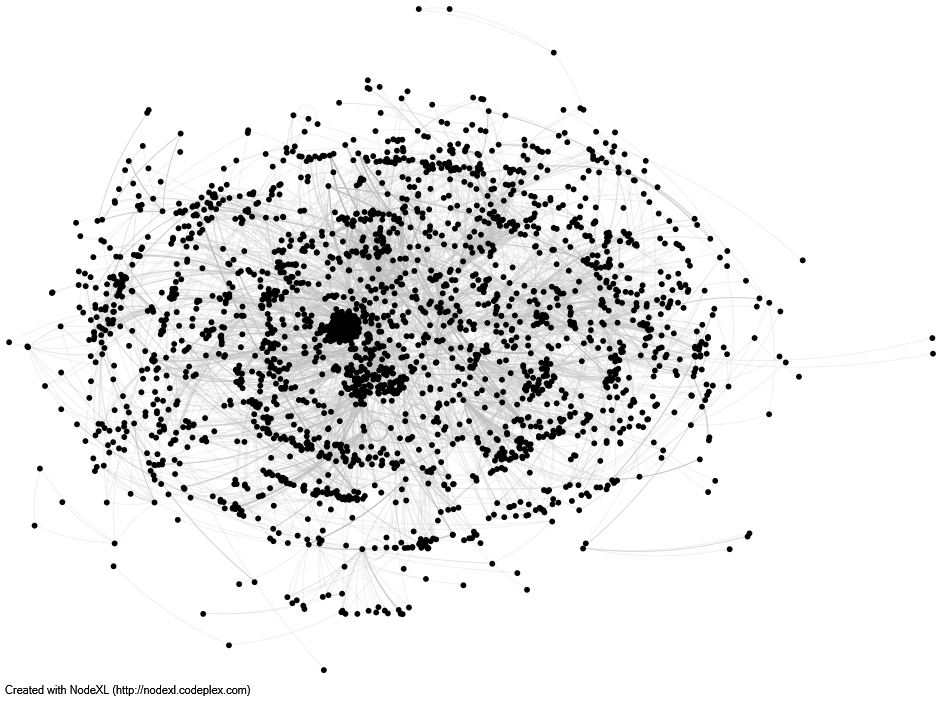

In [294]:
#network with no manipulation

from IPython.display import Image
Image("data/HashtagNetworkWholeNetwork.png")

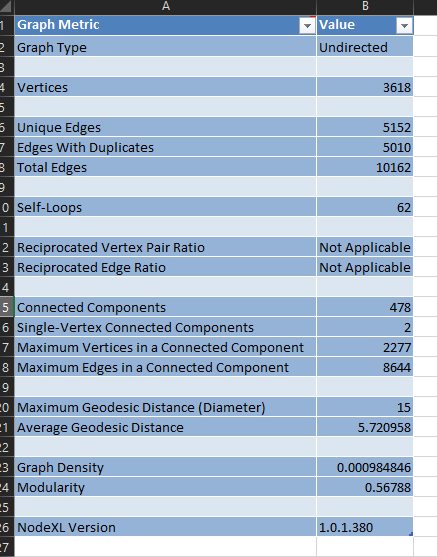

In [295]:
#Network Metrics

from IPython.display import Image
Image("data/HashtagNetworkMetrics.png")

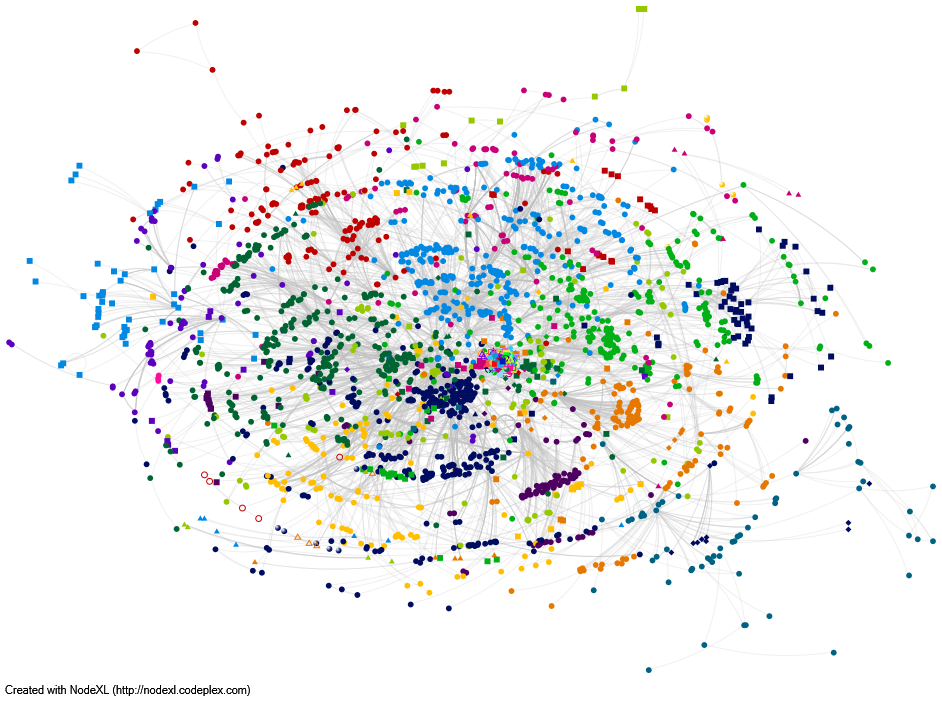

In [296]:
#network with groups created

from IPython.display import Image
Image("data/HashtagNetworkWholeNetworkGroups.png")

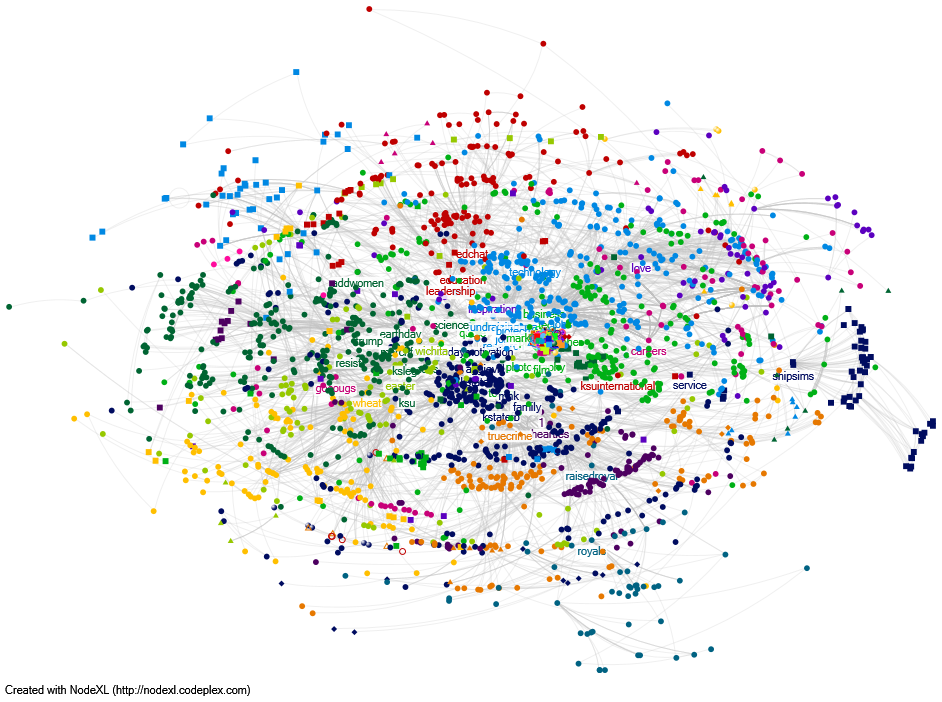

In [297]:
#network with groups and key people identified
#Vertex Label = Vertex
#Vertex Label Position calculated by Betweenness Centrality 
#Betweenness Centrality source value being greater than or equal to the 50th largest score

from IPython.display import Image
Image("data/HashtagNetworkWholeNetworkGroupsWithLabels.png")

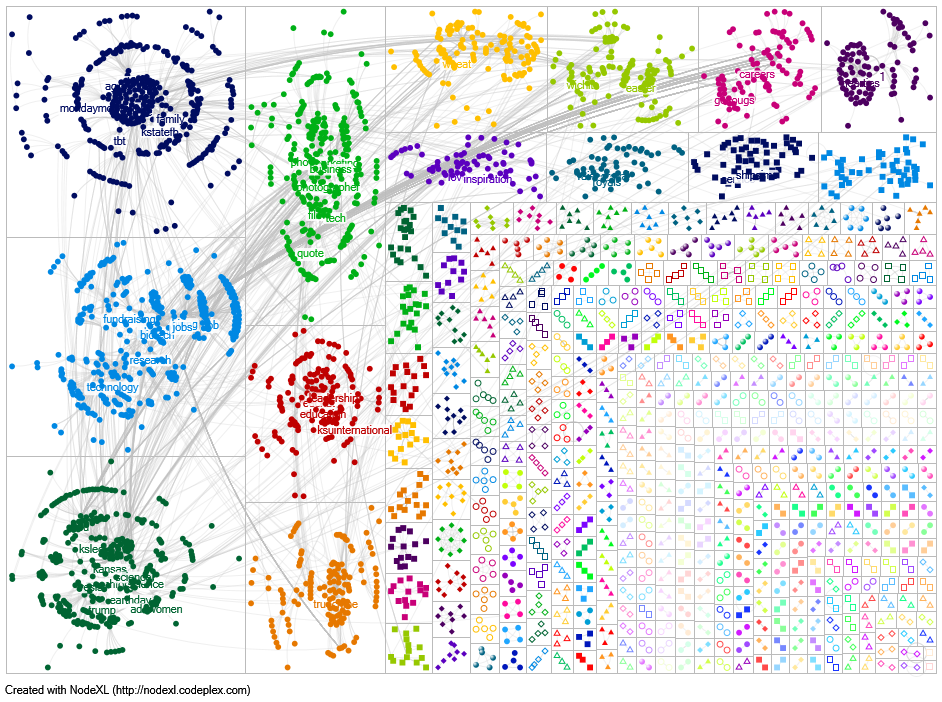

In [298]:
#network broken into corresponding groups

from IPython.display import Image
Image("data/HashtagNetworkGroupNetwork.png")

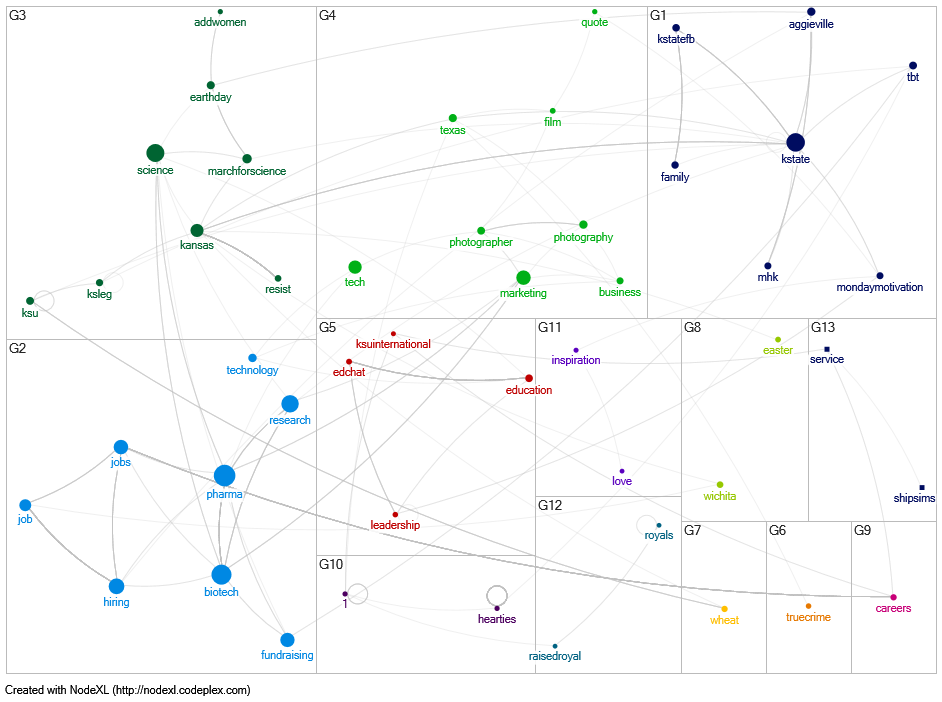

In [299]:
#Only top 50 vertices shown
#Vertex Visibility calculated by Betweenness Centrality 
#Betweenness Centrality source value being greater than or equal to the 50th largest score
#Vertex size calculated by Eigenvector Centrality
#Vertex largest size = 20, smallest = 1

from IPython.display import Image
Image("data/HashtagNetworkGroupNetworkTop50.png")

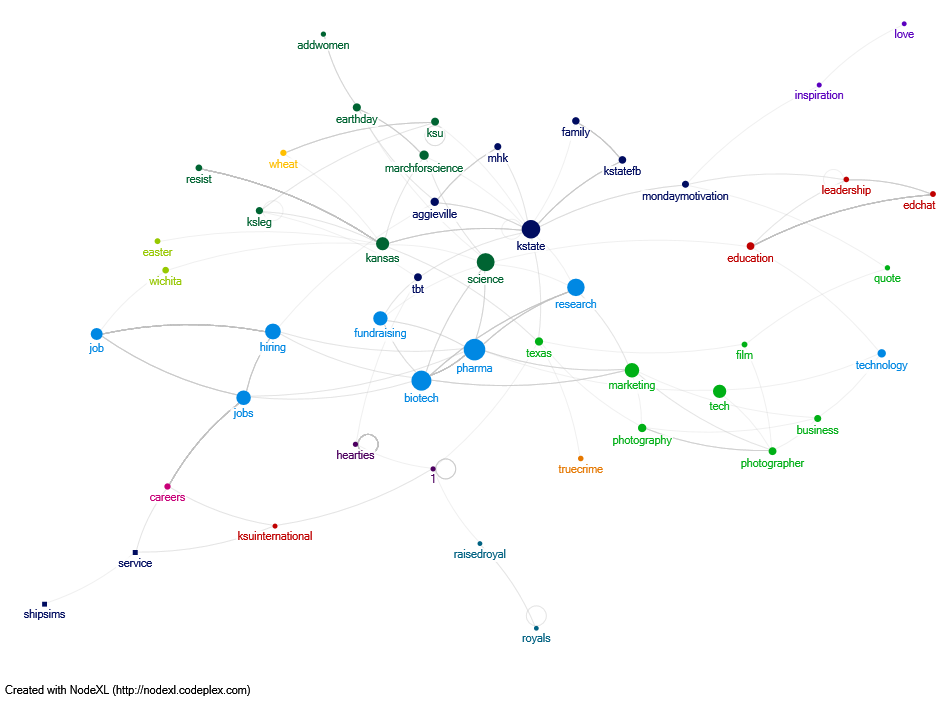

In [300]:
#Network returned to the whole network visualization with the manipulations left in place

from IPython.display import Image
Image("data/HashtagNetworkWholeNetworkGroupsTop50.png")

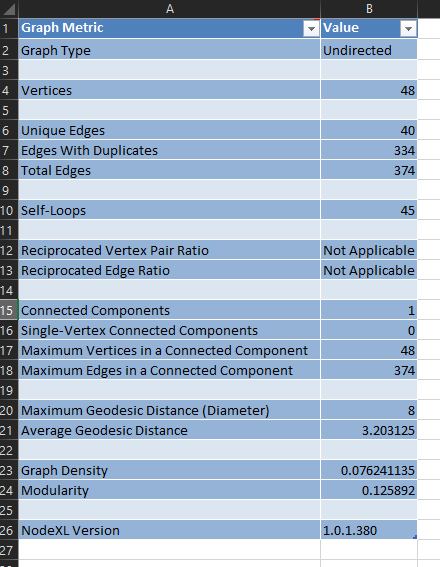

In [301]:
#Filtered Network Metrics

from IPython.display import Image
Image("data/HashtagFilteredNetworkMetrics.png")